# Milestone 2 Phase 2 (Sentiment Analysis of Tweets using NLP)


Nama : Luthfi Fadhlillah

Batch: FTDS 009

## Introduction

Dalam perkembangan zaman yang didorong oleh teknologi saat ini, media sosial (terutama Twitter) sering bertindak sebagai pusat untuk menuangkan pikiran, perasaan, dan pendapat. Untungnya, teknologi juga telah menyediakan sarana yang dengannya kita dapat mencoba mengevaluasi atau menganalisis beberapa pendapat tersebut. Melalui penggunaan machine learning dan natural language processing(NLP), terdapat metodologi di mana kita dapat melihat kumpulan kata dan menentukan sentimen. Faktanya adalah media sosial digunakan oleh ratusan juta orang setiap hari. Menurut laporan dari [oberlo.com](https://www.oberlo.com/blog/twitter-statistics#:~:text=There%20are%20330%20million%20monthly,are%20between%2035%20and%2065.), Twitter memiliki 330 juta pengguna aktif bulanan dan 145 juta pengguna aktif harian. Dengan pengguna sebanyak itu, akan menjadi tugas yang hampir mustahil untuk membuat orang membaca dan menafsirkan tweet sebanyak itu. Namun, dengan menggunakan sebuah model dari datasets yang ada, kita dapat mensortir ribuan tweet dalam hitungan menit dan mengevaluasi opini publik tentang topik pilihan yang sedang ramai diperbincangkan.

Di notebook ini, saya akan membangun sebuah model yang akan mencoba untuk menentukan sentimen dari tweet. Kumpulan data yang saya gunakan untuk proyek ini dapat ditemukan [di sini](https://data.world/crowdflower/brands-and-product-emotions). Tweet tersebut telah diberi label sebagai memiliki "positive emotion", "negative emotion", atau "no emotion" terhadap suatu merek atau produk.




## Import Libraries

Melakukan import libraries yang akan digunakan.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 200)
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk import word_tokenize
from gensim.models import word2vec

import string
import nltk
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from bs4 import BeautifulSoup
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras import regularizers
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')

## Data Loading
Melakukan data loading terhadap dataset yang sudah disiapkan

In [2]:
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')
df.head(20)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear,Apple,Positive emotion


Kita bisa mengetahui jenis tweet yang positif dan negatif. Kita juga dapat melihat bahwa tweet telah diklasifikasikan berdasarkan sentimen dan produk atau merek apa yang terkait dengannya. Tweet itu sendiri berisi referensi ke festival SXSW. Mereka berisi sebutan, tagar, dan tautan eksternal ke berbagai situs web. Untuk mempermudah manipulasi kerangka data, saya akan mengganti nama kolom menjadi lebih sederhana.

In [3]:
df.rename(columns={'tweet_text':'tweet', 'emotion_in_tweet_is_directed_at':'brand_product', 
                  'is_there_an_emotion_directed_at_a_brand_or_product':'sentiment'}, inplace=True)

In [4]:
df.head(5)

,tweet,brand_product,sentiment
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion


In [5]:
#berapa banyak tweet yang termasuk dalam dataset ini
len(df)

9093

Kita memiliki total 9093 tweet. Saya akan memeriksa tweet ini berdasarkan sentimen dan merek/produk terkait.

In [6]:
df.isna().sum()

tweet               1
brand_product    5802
sentiment           0
dtype: int64

Ada 5802 null values untuk kolom brand. Itu lebih dari setengah tweet dalam dataset! Saya membutuhkan cara untuk setidaknya mencoba dan mengidentifikasi sebagian besar dari tweet tersebut sehingga saya dapat memiliki eksplorasi data yang lebih menyeluruh.

In [7]:
df.brand_product.value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: brand_product, dtype: int64

Saya akan memilih untuk menghapus baris yang sesuai dengan null value di kolom `tweet`. Tweet tampaknya lebih condong ke produk Apple. Kami akan mengganti null value di kolom brand dengan frasa `no_brand` sehingga saya dapat memfilter dengan kata kunci ini dan melihat beberapa tweet terkait.

In [8]:
df.dropna(subset=['tweet'], inplace=True)
df.fillna('no_brand', inplace=True)

In [9]:
df.brand_product.value_counts() #lihat berapa banyak tweet yang terkait dengan brand dan product

no_brand                           5801
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: brand_product, dtype: int64

In [10]:
df.sentiment.value_counts() #hitung tweet berdasarkan sentimen

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: sentiment, dtype: int64

Sebagian besar tweet diberi label neutral. Saat ini hanya ada 570 tweet yang diberi label negatif. Ketidakseimbangan kelas ini kemungkinan akan menyulitkan model NLP untuk mengenali tweet negatif. Kita harus mempertimbangkan berbagai pilihan termasuk resampling dan menggabungkan kelas untuk mencoba dan meningkatkan model.

## Cleaning Data

Mari kita lihat 20 tweet pertama dan 20 tweet terakhir dari dataset. 20 tweet pertama yang telah saya pratinjau sebelumnya sepertinya cukup mudah dibersihkan. Namun, saya tidak dapat berasumsi bahwa semua tweet akan sesederhana ini. Dengan melihat 20 tweet terakhir, saya berharap menemukan beberapa tweet yang tidak biasa yang membantu memandu cara saya membersihkan teks.

In [11]:
df.head(20)

,tweet,brand_product,sentiment
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd,no_brand,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear,Apple,Positive emotion
10,Excited to meet the @samsungmobileus at #sxsw so I can show them my Sprint Galaxy S still running Android 2.1. #fail,Android,Positive emotion


In [12]:
df.tail(20)

,tweet,brand_product,sentiment
9073,At #SXSW your iphone charger is your best friend.,no_brand,No emotion toward brand or product
9074,At &quot;Your Mom Has an iPad: Designing for Boomers&quot; #sxsw @mention Austin Convention Center {link},no_brand,No emotion toward brand or product
9075,At &quot;Your Mom Has an iPad&quot; session #yourmom #sxsw,no_brand,No emotion toward brand or product
9076,At &quot;Your Mom Has an iPad&quot; session at #SXSW (@mention ACC - Ballroom B w/ 23 others) {link},no_brand,No emotion toward brand or product
9077,@mention your PR guy just convinced me to switch back to iPhone. Great #sxsw coverage. #princess,iPhone,Positive emotion
9078,Cue the hype RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles,no_brand,No emotion toward brand or product
9079,&quot;papyrus...sort of like the ipad&quot; - nice! Lol! #SXSW Lavelle,iPad,Positive emotion
9080,"Diller says Google TV &quot;might be run over by the PlayStation and the Xbox, which are essentially ready today.&quot; #sxsw #diller",Other Google product or service,Negative emotion
9081,Google says reports about launch of Circles social network at #sxsw are incorrect {link} No launch today at any rate.,no_brand,No emotion toward brand or product
9082,#Apple guys screaming and running by line to open the shop #austin #sxsw #ipad2 #crazyco {link},no_brand,No emotion toward brand or product


Kita dapat melihat dari indeks 9074 dan 9092 bahwa ada karakter atipikal yang perlu kita hapus dari tweet untuk membuat analisis sentimen lebih kuat dan akurat. Karakter non-ASCII dan referensi karakter HTML tidak akan banyak berguna dalam menentukan sentimen.

Saya akan mendrop indeks 9092 karena tampaknya bahkan setelah cleaning tweet itu tidak masuk akal dan sulit diartikan.

**Note:** saya juga akan mereset indeks dataframe kapan pun saya menghapus baris tertentu. Pandas tidak mereset indeks secara otomatis setelah mendrop dan mereset indeks akan membantu menghindari beberapa kesalahan dalam analisis dan pemodelan dikedepannya.

In [13]:
#drop baris terakhir
df.drop(9092, inplace=True)
df.reset_index(drop=True, inplace=True)

Mengingat bahwa kita memiliki begitu banyak nilai nol di kolom brand, kita perlu menemukan cara yang efisien untuk memilah-milah tweet tersebut sehingga kita dapat mengklasifikasikannya sebagai salah satu brand atau produk yang sudah disediakan oleh kumpulan data asli. Mencoba menyisir 5000 tweet secara manual terlalu memakan waktu, jadi kita akan mengulangi tweet tidak berbrand dan mencari kata kunci di dalam teks.

Dalam hal ini kita akan menggunakan nested for loops untuk mengulangi setiap baris dataframe dan setiap kata dalam tweet. kita akan memiliki daftar kata kunci/frasa yang mengarah ke brand atau produk tertentu. Di sini kata kunci/frasa hanya akan menjadi brand/produk yang sudah terdaftar di dataset. kita akan mengubah kapitalisasi kata kunci dan frasa dengan harapan dapat menangkap tweet tidak berbrand sebanyak mungkin. Jika kata kunci atau frasa ada dalam tweet, maka kita akan menetapkan ulang tweet tersebut dari `no_brand` ke salah satu brand/produk yang sudah terdaftar.

Urutan di mana kita menjalankan loop ini penting. Misalnya jika tweet merujuk pada iPhone dan iPad, mengeksekusi loop dengan kata kunci iPhone sebelum kata kunci iPad akan menyebabkan tweet tersebut dilabeli sebagai tweet terkait iPhone. Mengingat bahwa huruf besar bervariasi dan kita tidak tahu urutan kata dalam tweet tidak berbrand, ada terlalu banyak kombinasi berbeda yang perlu dicoba. Perulangan for yang melewati setiap kombinasi juga akan membutuhkan banyak pernyataan `if-else` yang kompleks. Takeaway utama di sini adalah bahwa kita ingin menjadi efisien dan dapat digeneralisasikan.

In [14]:
ipad_app_keywords = ['iPad app', 'ipad app', 'IPad app', 'IPAD app', 'Ipad app']
iphone_app_keywords = ['iPhone app', 'iphone app', 'IPhone app', 'Iphone app', 'IPHONE app']
android_app_keywords = ['android app', 'Android app', 'ANDROID app']

#mengklasifikasi ulang tweet tidak bermerek sebagai tweet yang terkait dengan aplikasi iOS
for i in range(0, len(df)):                       #iterasi melalui setiap baris dalam dataframe
    if df.loc[i, 'brand_product'] == 'no_brand':  
        tweet_phrase = df.loc[i, 'tweet']         
        for word in ipad_app_keywords:            
            if word in tweet_phrase:          
                df.loc[i, 'brand_product'] = 'iPad or iPhone App'
            else:                                 
                continue
    else:                                         
        continue
        

for i in range(0, len(df)):
    if df.loc[i, 'brand_product'] == 'no_brand':
        tweet_phrase = df.loc[i, 'tweet']
        for word in iphone_app_keywords:
            if word in tweet_phrase:
                df.loc[i, 'brand_product'] = 'iPad or iPhone App'
            else:
                continue
    else:
        continue
        
for i in range(0, len(df)):
    if df.loc[i, 'brand_product'] == 'no_brand':
        tweet_phrase = df.loc[i, 'tweet']
        for word in android_app_keywords:
            if word in tweet_phrase:
                df.loc[i, 'brand_product'] = 'Android App'
            else:
                continue
    else:
        continue


In [15]:
ipad_keywords = ['iPad', 'ipad', 'IPad', 'IPAD', 'Ipad' '#ipad', '#iPad', '#IPad', '#IPAD', '#Ipad']

iphone_keywords = ['iPhone', 'iphone', 'IPhone', 'IPHONE', 'Iphone', '#iphone', '#iPhone', '#IPhone'
                  '#Iphone', '#IPHONE']

android_keywords = ['android', 'Android', 'ANDROID', '#android', '#Android', '#ANDROID']

#reclassify unbranded tweets as tweets related to iPad devices
for i in range(0, len(df)):
    if df.loc[i, 'brand_product'] == 'no_brand':
        tweet_phrase = df.loc[i, 'tweet']
        for word in ipad_keywords:
            if word in tweet_phrase:
                df.loc[i, 'brand_product'] = 'iPad'
            else:
                continue
    else:
        continue

#reclassify unbranded tweets as tweets related to iPhone devices
for i in range(0, len(df)):
    if df.loc[i, 'brand_product'] == 'no_brand':
        tweet_phrase = df.loc[i, 'tweet']
        for word in iphone_keywords:
            if word in tweet_phrase:
                df.loc[i, 'brand_product'] = 'iPhone'
            else:
                continue
    else:
        continue

#reclassify unbranded tweets as tweets related to Android devices
for i in range(0, len(df)):
    if df.loc[i, 'brand_product'] == 'no_brand':
        tweet_phrase = df.loc[i, 'tweet']
        for word in android_keywords:
            if word in tweet_phrase:
                df.loc[i, 'brand_product'] = 'Android'
            else:
                continue
    else:
        continue

In [16]:
#reclassify all other unbranded tweets as either Google or Apple

apple_keywords = ['iPhone', 'iPad', 'iTunes', 'iphone', 'ipad', 'itunes', 'apple', '#iPhone', '#iphone', 
                 '#iPad', '#ipad', '#Apple', '#apple', 'Apple', 'IPAD', 'IPHONE', 'ITUNES', 'IPad', 'IPhone']
google_keywords = ['Google', 'google', 'Android', 'android', '#google', '#Google', '#Android', '#android', 
                  'GOOGLE', 'ANDROID']

for i in range(0, len(df)):
    if df.loc[i, 'brand_product'] == 'no_brand':
        tweet_phrase = df.loc[i, 'tweet']
        for word in apple_keywords:
            if word in tweet_phrase:
                df.loc[i, 'brand_product'] = 'Apple'
            else:
                continue
    else:
        continue
        
for i in range(0, len(df)):
    if df.loc[i, 'brand_product'] == 'no_brand':
        tweet_phrase = df.loc[i, 'tweet']
        for word in google_keywords:
            if word in tweet_phrase:
                df.loc[i, 'brand_product'] = 'Google'
            else:
                continue
    else:
        continue

Dua loop terakhir merek apa pun yang sebelumnya tidak diidentifikasi hanya sebagai Apple atau Google jika masih ada tweet yang harus memiliki label dan tidak. Sekali lagi, saya telah membuat asumsi yang sama bahwa dengan menjalankan Apple `for` loop terlebih dahulu, tweet yang menyebutkan lebih dari satu produk akan diklasifikasikan sebagai milik grup produk pertama yang disebutkan.

In [17]:
df.brand_product.value_counts()

iPad                               2450
Google                             2126
Apple                              1424
iPhone                             1043
no_brand                            721
iPad or iPhone App                  606
Android                             296
Other Google product or service     293
Android App                          97
Other Apple product or service       35
Name: brand_product, dtype: int64

Kita telah secara signifikan mengurangi jumlah tweet tidak bermerek dengan menjalankan `for` loop yang akan membantu dalam EDA nanti.

Kita juga harus memeriksa untuk melihat berapa banyak tweet yang tidak memiliki sentimen yang ditetapkan. Tweet tanpa sentimen tidak akan berguna bagi Kita, jadi Kita perlu memeriksa dan melihat apakah beberapa tweet dapat digunakan atau harus dihapus sama sekali.

In [18]:
df.sentiment.value_counts()


No emotion toward brand or product    5387
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: sentiment, dtype: int64

In [19]:
#Check sentiment dari unbranded tweets
df.loc[df['brand_product'] == 'no_brand']['sentiment'].value_counts()


No emotion toward brand or product    704
Positive emotion                       10
I can't tell                            6
Negative emotion                        1
Name: sentiment, dtype: int64

Kita dapat melihat bahwa distribusi sentimen di antara tweet yang tidak bermerek mirip dengan dataset keseluruhan. Mendrop tweet tidak bermerek akan menghapus lebih dari 10% tweet netral dan hanya sejumlah kecil tweet positif atau negatif.

Karena hanya ada 156 tweet yang tidak memiliki sentimen yang ditetapkan, kita akan melihat masing-masing tweet ini satu per satu untuk melihat apakah tweet tersebut dapat di reassigned.

In [20]:
pd.set_option('display.max_rows', None) 
df.loc[df['sentiment'] == "I can't tell"]

,tweet,brand_product,sentiment
89,Thanks to @mention for publishing the news of @mention new medical Apps at the #sxswi conf. blog {link} #sxsw #sxswh,no_brand,I can't tell
101,ÛÏ@mention &quot;Apple has opened a pop-up store in Austin so the nerds in town for #SXSW can get their new iPads. {link} #wow,iPad,I can't tell
236,"Just what America needs. RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw",Google,I can't tell
340,The queue at the Apple Store in Austin is FOUR blocks long. Crazy stuff! #sxsw,Apple,I can't tell
367,Hope it's better than wave RT @mention Buzz is: Google's previewing a social networking platform at #SXSW: {link},Google,I can't tell
412,SYD #SXSW crew your iPhone extra juice pods have been procured.,iPhone,I can't tell
440,Why Barry Diller thinks iPad only content is nuts @mention #SXSW {link},iPad,I can't tell
487,Gave into extreme temptation at #SXSW and bought an iPad 2... #impulse,iPad,I can't tell
639,Catch 22Û_ I mean iPad 2 at #SXSW : {link},iPad,I can't tell
704,Forgot my iPhone for #sxsw. Android only. Knife to a gun fight,iPhone,I can't tell


Dari 156 tweet, saya memilih untuk menyimpan indeks tweet dalam daftar berdasarkan apakah itu positif, negatif, atau netral. Kemudian menggunakan `for` loop, saya mengulangi indeks masing-masing dalam daftar untuk memperbarui tweet di dataframe. Dalam beberapa kasus, saya menemukan tweet dalam bahasa asing dan membuat penilaian terhadap tweet tersebut jika dan hanya jika saya dapat menentukan bahasa tweet tersebut. Masih ada beberapa tweet yang tidak memiliki sentimen yang jelas dan saya memilih untuk meninggalkannya sebagai "I can't tell".

In [21]:
#sort "I can't tell tweets sebagai positive, negative atau neutral"
#hanya sort tweets yang memiliki brand
positive_index = [340, 487, 704, 744, 1163, 1296, 2094, 2333, 2471, 2613, 2731, 2901, 3144, 3220, 3466,
                 3854, 4095, 4296, 7270, 7569, 881]

negative_index = [101, 236, 639, 1390, 1669, 1780, 1907, 1960, 2115, 2546, 2616, 2973, 3057, 3297, 3351, 
                 3538, 4001, 4537, 4559, 4881, 4898, 4914, 4941, 5323, 5395, 5395, 5663, 5925, 5960, 6648, 6669,
                 7201, 7838, 8063, 8321, 8460, 8508, 8610, 8830, 9019, 9031, 9057, 9065]

neutral_index = [367, 412, 440, 748, 1068, 1086, 1421, 1436, 1557, 1598, 1715, 1935, 2143, 2166, 2262, 2447, 
                2524, 2596, 2738, 2773, 2953, 3190, 3196, 3264, 3350, 3500, 3893, 3938, 3940, 4085, 4137, 4289,
                4309, 4374, 4617, 4861, 5151, 5661, 5826, 6465, 6946, 7236, 7266, 8204, 8469, 8495, 8513, 8845
                ]

#bahasa berbeda
#[748, 881, 1544, 2067, 2317, 5761, 8630]

#I can't tell
#[4560, 4744, 5221, 5257, 5367, 6397, 6731, 6914, 7035, 7042, 7175, 7211, 7338, 7382, 7468, 7480
# 7494, 7732, 7810, 7888, 8014, 8130, 8524, 8701, 8712, 9036]



In [22]:
#terjemahan bahasa Inggris dari dua tweet Spanyol

df.loc[748, 'tweet'] = 'Google will not be launching any products at South by SouthWest #sxsw 2011 {link}'
df.loc[881, 'tweet'] = 'I am buying my iPad in the #SXSW (@mention Apple Store, SXSW w/ 62 others) {link}'


#reassign unknown tweets sebagai positive, negative, atau neutral sentiment
for i in positive_index:
    df.loc[i, 'sentiment'] = 'Positive emotion'
    
for j in negative_index:
    df.loc[j, 'sentiment'] = 'Negative emotion'
    
for k in neutral_index:
    df.loc[k, 'sentiment'] = 'No emotion toward brand or product'

Dengan mengklasifikasikan lebih dari 100 tweet, kita hanya memiliki 45 tweet tanpa sentimen. Kita akan memilih untuk menghapus tweet tersebut dari dataset.

In [23]:
df.sentiment.value_counts()

No emotion toward brand or product    5435
Positive emotion                      2999
Negative emotion                       612
I can't tell                            45
Name: sentiment, dtype: int64

In [24]:
df.loc[df['brand_product'] == "no_brand"]


,tweet,brand_product,sentiment
50,"ÛÏ@mention {link} &lt;-- HELP ME FORWARD THIS DOC to all Anonymous accounts, techies,&amp; ppl who can help us JAM #libya #SXSW",no_brand,No emotion toward brand or product
51,÷¼ WHAT? ÷_ {link} ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter,no_brand,No emotion toward brand or product
52,".@mention @mention on the location-based 'fast, fun and future' - {link} (via @mention #sxsw",no_brand,No emotion toward brand or product
64,Agree. RT @mention Wait. FIONA APPLE is in town??? Somebody kidnap her and put her in a recording studio until she records a new album. #sxsw,no_brand,No emotion toward brand or product
65,At #sxsw? @mention / @mention wanna buy you a drink. 7pm at Fado on 4th. {link} Join us!,no_brand,No emotion toward brand or product
70,Chilcott: @mention #SXSW stand talking with Blogger staff. Too late to win competition for best tweet mentioning @mention So no t-shirt.,no_brand,No emotion toward brand or product
72,Gowalla's @mention promises to launch Foursquare check-in + Groupon rewards-type service at #SXSW. Finger's crossed. {link},no_brand,No emotion toward brand or product
76,I worship @mention {link} #SXSW,no_brand,No emotion toward brand or product
78,"Launching @mention #SxSW? RT @mention @mention Denies Social Network Called Circles Will Debut Today, Despite Report {link}",no_brand,No emotion toward brand or product
84,Stay tune @mention showcase #H4ckers {link} #SXSW,no_brand,No emotion toward brand or product


Di atas, saya telah mempratinjau beberapa tweet tidak bermerek sehingga saya dapat memahami karakter khusus apa yang ada di dalam tweet sehingga saya dapat menulis fungsi atau loop untuk membersihkan setiap tweet dengan tepat.

Di bawah ini adalah contoh tweet yang berisi karakter non-ASCII dan referensi HTML (yaitu `&quot;` yang dimaksudkan untuk menunjukkan tanda kutip dalam HTML).

In [25]:
df.loc[101, 'tweet']

'\x89ÛÏ@mention &quot;Apple has opened a pop-up store in Austin so the nerds in town for #SXSW can get their new iPads. {link} #wow'

Sudah ada fungsi `.encode` dan `.decode` yang dapat kita gunakan untuk membersihkan tweet. Kita hanya akan mengkodekan karakter ASCII yang akan menghapus karakter khusus dan kemudian mendekode string sehingga Kita dapat membacanya. Kita akan menggunakan BeautifulSoup untuk menyingkirkan semua referensi karakter HTML. HTML mengenali referensi karakter tersebut dan akan menghapusnya dari teks seperti halnya tag HTML lainnya.

In [26]:
string_ = df.loc[101, 'tweet']
encoded_string = string_.encode('ascii', "ignore")
decode_string = encoded_string.decode()
clean_string = BeautifulSoup(decode_string, 'lxml').text
print(clean_string)

@mention "Apple has opened a pop-up store in Austin so the nerds in town for #SXSW can get their new iPads. {link} #wow


Tweet yang dibersihkan sekarang terlihat persis seperti di Twitter! Yang perlu dihilangkan hanyalah tanda baca yang akan kita lakukan nanti ketika kita mendefinisikan fungsi untuk mengubah teks tweet menjadi token.

In [27]:
#Membuat dataframe baru dengan hanya branded tweets dan positive, negative, dan neutral sentiment
df_branded = df.loc[(df.brand_product != "no_brand") & (df.sentiment != "I can't tell")]
df_branded.reset_index(drop=True, inplace=True)

In [28]:
df_branded.brand_product.value_counts()


iPad                               2438
Google                             2113
Apple                              1416
iPhone                             1038
iPad or iPhone App                  605
Android                             296
Other Google product or service     292
Android App                          97
Other Apple product or service       35
Name: brand_product, dtype: int64

Saya akan mengimpor stopwords bahasa Inggris dari NLTK serta WordNetLemmatizer untuk mengubah kata-kata menjadi bentuk root.

In [29]:
#nltk.download('wordnet')
#nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()


Di bawah ini saya akan membuat dua fungsi:
1. Fungsi pertama hanya akan membersihkan tweet seperti yang kita lakukan di atas sehingga muncul seperti saat menggunakan Twitter. Ini akan berguna untuk EDA dan feature engineering karena kita mungkin ingin menghitung jumlah sebutan atau tagar dan melihat apakah jumlah tersebut berbeda di antara sentimen.

2. Fungsi kedua akan melakukan semua hal yang sama seperti yang pertama tetapi mengambil langkah lebih jauh dengan menghapus semua tanda baca dan kemudian membuat lemmatisasi kata-katanya. Token akan disimpan sebagai daftar di kolom terpisah.

In [30]:
def clean_tweets(text):
    """This function takes in a string (in this case a tweet) and cleans the string such that any and all
    non-ASCII charcaters and HTML characters references are removed.
    
    The string will still have all forms of punctuation.
    
    """
    text = re.sub(' +', ' ', text) #reduce instances of multiple blank spaces to a single space
    encoded_text = text.encode('ascii', 'ignore') #encode string using 'ascii' encoding
    decode_text = encoded_text.decode() #decode string (convert from bytes to string object)
    clean_text = BeautifulSoup(decode_text, 'lxml').text #remove all html encodings such as &amp;, &quot;, etc.
    
    return clean_text
    

In [31]:
def clean_tweets_modeling(text):
    """Performs a similar operation as the clean_tweets function except this function will create a list of 
    tokens that can be used for NLP modeling.
    
    For example, a tweet will be transformed such that all non-ASCII characters and HTML encodings are removed.
    Then the function will remove all punctuation from the tweet, split each word in the tweet by white space,
    and finally lemmatize each word in the tweet and group the lemmatized tokens in a list."""
    
    text = re.sub(' +', ' ', text) #reduce instances of multiple spaces to a single space
    encoded_text = text.encode('ascii', 'ignore') #encode text as ascii characters only
    decode_text = encoded_text.decode() #convert bytes back to a string
    clean_text = BeautifulSoup(decode_text, 'lxml').text #remove html tages using BeautifulSoup
    
    no_punc_text = "".join([word for word in clean_text if word not in string.punctuation]) #remove punctuation
    tokens = re.split('\W+', no_punc_text) #split words by in no_punc_text variable by whitespace
    
    #Lemmatize each token and store tokens in a list
    final_tokens = [wnl.lemmatize(word) for word in tokens if word not in stopwords]
    
    return final_tokens    

In [32]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Luthfi
[nltk_data]     Fadhlillah\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [33]:
df_branded['tweet'] = df_branded['tweet'].apply(lambda x: clean_tweets(x))
df_branded['tweet_tokens'] = df_branded['tweet'].apply(lambda x: clean_tweets_modeling(x.lower()))

C:\Users\Luthfi Fadhlillah\AppData\Local\Programs\Python\Python38\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\Luthfi Fadhlillah\AppData\Local\Temp\ipykernel_13364\257423577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_branded['tweet'] = df_branded['tweet'].apply(lambda x: clean_tweets(x))
C:\Users\Luthfi Fadhlillah\AppData\Local\Temp\ipykernel_13364\257423577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [34]:
df_branded.head()

,tweet,brand_product,sentiment,tweet_tokens
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion,"[wesley83, 3g, iphone, 3, hr, tweeting, riseaustin, dead, need, upgrade, plugin, station, sxsw]"
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion,"[jessedee, know, fludapp, awesome, ipadiphone, app, youll, likely, appreciate, design, also, theyre, giving, free, t, sxsw]"
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion,"[swonderlin, wait, ipad, 2, also, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion,"[sxsw, hope, year, festival, isnt, crashy, year, iphone, app, sxsw]"
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) & Matt Mullenweg (Wordpress)",Google,Positive emotion,"[sxtxstate, great, stuff, fri, sxsw, marissa, mayer, google, tim, oreilly, tech, booksconferences, matt, mullenweg, wordpress]"


Di atas kita dapat melihat bahwa masing-masing token sekarang disimpan dalam daftar di kolom `tweet_tokens`.

Kita juga akan memberikan nomor untuk masing-masing dari 3 sentimen untuk kemudahan manipulasi dalam EDA dan pemodelan.

In [35]:
#reassign sentiment values to integers
df_branded['sentiment'].replace({'Positive emotion': 1, 'Negative emotion': 0, 
                                 'No emotion toward brand or product': 2}, inplace=True)

C:\Users\Luthfi Fadhlillah\AppData\Local\Temp\ipykernel_13364\509420111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_branded['sentiment'].replace({'Positive emotion': 1, 'Negative emotion': 0,


## Exploratory Data Analysis (EDA)

Pertama-tama mari kita lihat kata-kata yang paling umum di setiap jenis tweet (positif, negatif, dan netral). Idealnya kita akan memiliki kata-kata unik di setiap jenis tweet karena itu akan memudahkan model untuk mendeteksi sentimen. Jika kita menemukan bahwa ada banyak kata umum di setiap jenis tweet, kita mungkin harus mempertimbangkan untuk memberi label tersebut sebagai stopwords karena akan mengurangi model yang dapat menentukan sentimen.

In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [37]:
positive_text = []
negative_text = []
neutral_text = []


df_positive = df_branded.loc[df_branded.sentiment == 1]
df_negative = df_branded.loc[df_branded.sentiment == 0]
df_neutral = df_branded.loc[df_branded.sentiment == 2]

for list_element in df_positive['tweet_tokens']: 
    for word in list_element: 
        positive_text.append(word) 
        
for list_element in df_negative['tweet_tokens']:
    for word in list_element:
        negative_text.append(word)
        
for list_element in df_neutral['tweet_tokens']:
    for word in list_element:
        neutral_text.append(word)
        
positive_str = ' '.join(positive_text) 
negative_str = ' '.join(negative_text)
neutral_str = ' '.join(neutral_text)

In [38]:
from collections import Counter

pos_dict = Counter(positive_text)
neg_dict = Counter(negative_text)
neu_dict = Counter(neutral_text)

In [39]:
#sort the word counts in descending order
pos_dict_sorted = dict(sorted(pos_dict.items(), key=lambda item: item[1], reverse=True))
neg_dict_sorted = dict(sorted(neg_dict.items(), key=lambda item: item[1], reverse=True))
neu_dict_sorted = dict(sorted(neu_dict.items(), key=lambda item: item[1], reverse=True))

#create dataframes of words counts for each type of tweet
pos_text_df = pd.DataFrame.from_dict(pos_dict_sorted, orient='index', columns=['Count'])
pos_text_df.reset_index(inplace=True)
pos_text_df.rename(columns={'index':'Word'}, inplace=True)

neg_text_df = pd.DataFrame.from_dict(neg_dict_sorted, orient='index', columns=['Count'])
neg_text_df.reset_index(inplace=True)
neg_text_df.rename(columns={'index':'Word'}, inplace=True)

neu_text_df = pd.DataFrame.from_dict(neu_dict_sorted, orient='index', columns=['Count'])
neu_text_df.reset_index(inplace=True)
neu_text_df.rename(columns={'index':'Word'}, inplace=True)

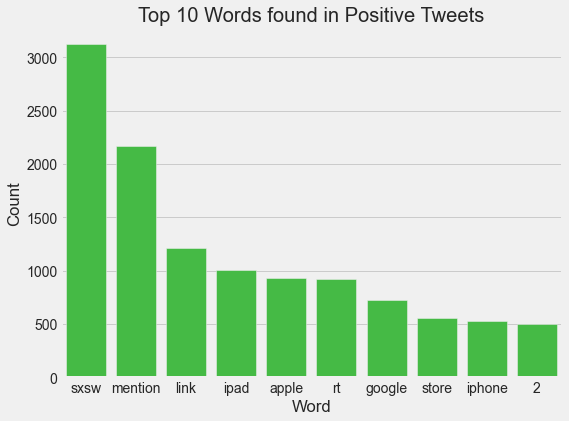

In [40]:
plt.figure(figsize=(8,6))
sns.barplot(x=pos_text_df['Word'][:10], y=pos_text_df['Count'][:10], data=pos_text_df[:10], color='limegreen')
plt.title('Top 10 Words found in Positive Tweets')
plt.savefig('top10pos.png')

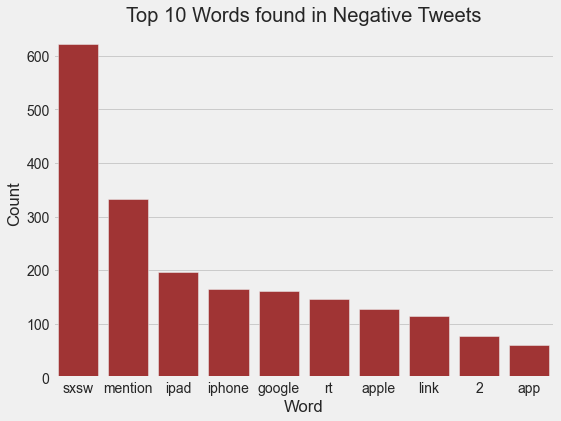

In [41]:
plt.figure(figsize=(8,6))
sns.barplot(x=neg_text_df['Word'][:10], y=neg_text_df['Count'][:10], data=neg_text_df[:10], color='firebrick')
plt.title('Top 10 Words found in Negative Tweets')
plt.savefig('top10neg.png')

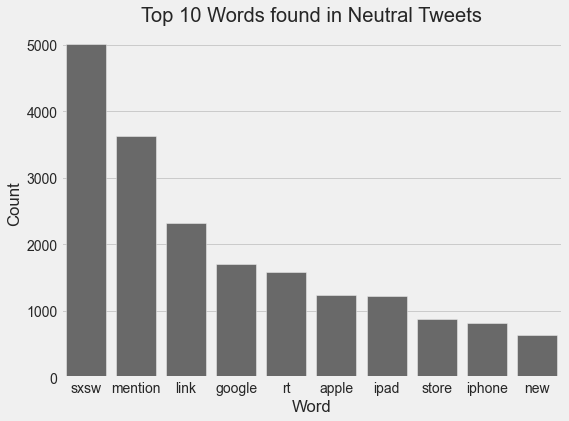

In [42]:
plt.figure(figsize=(8,6))
sns.barplot(x=neu_text_df['Word'][:10], y=neu_text_df['Count'][:10], data=neu_text_df[:10], color='dimgrey')
plt.title('Top 10 Words found in Neutral Tweets')
plt.savefig('top10neu.png')

Kita dapat melihat bahwa ada banyak kata umum di setiap jenis tweet. Kita juga melihat bahwa Apple dan Google sering disebut dalam setiap jenis tweet. Kata yang paling umum adalah 'sxsw' yang menunjukkan bahwa sebagian besar jika tidak semua tweet berpusat di sekitar acara festival SXSW. Beberapa tweet memiliki nama pengguna yang diganti dengan kata 'mention' yang berarti bahwa pembuat tweet ingin menandai dan/atau mereply ke pengguna lain. Ada juga contoh di mana alih-alih melihat URL untuk link eksternal, URL diganti dengan kata 'link'. Huruf 'rt' menunjukkan bahwa pengguna mencoba me-retweet (khususnya mengutip tweet) tweet orang lain dan mungkin menambahkan pemikiran mereka sendiri ke tweet tersebut. Ini adalah jenis kata yang mungkin perlu dihilangkan karena kemunculannya yang biasa di berbagai sentimen hanya akan membingungkan modelnya.

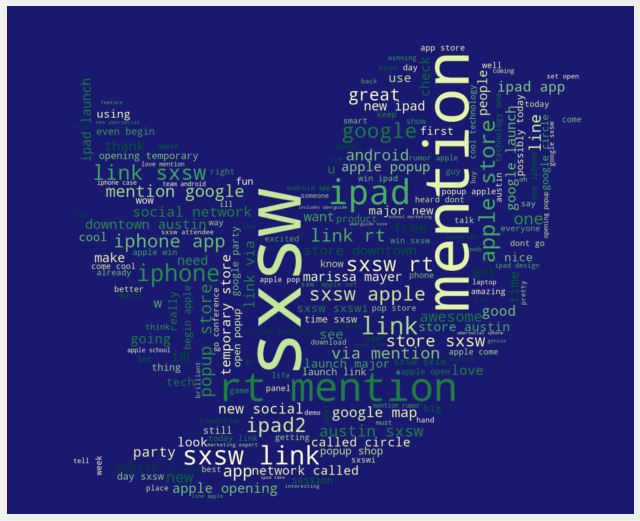

In [44]:
mask = np.array(Image.open('twitter_logo_2.png'))
wc_pos = WordCloud(background_color="midnightblue", mask=mask, colormap='YlGn')
wc_pos.generate(positive_str)

plt.figure(figsize=(10,10))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_pos.to_file('pos_wordcloud.png')

Di atas kita memiliki WordCloud kata-kata dan bigrams (dalam bentuk logo Twitter) yang ditemukan di tweet positif. Kita bisa melihat kata-kata dan frase seperti 'cool', 'great', 'new ipad', dan 'party' sering muncul. Ini sesuai dengan pemahaman umum kita tentang apa yang mungkin kita harapkan dalam tweet yang memiliki sentimen positif. Kata-kata dan frasa yang menunjukkan kegembiraan atas suatu merek atau produk adalah indikator yang baik bahwa tweet harus positif. kita juga melihat kata-kata umum yang kita diskusikan di atas ketika melihat 10 kata paling umum.

In [46]:
wc_pos.words_

{'sxsw': 1.0,
 'mention': 0.5727040816326531,
 'rt mention': 0.5688775510204082,
 'ipad': 0.40114795918367346,
 'sxsw link': 0.19834183673469388,
 'link': 0.1747448979591837,
 'iphone': 0.15943877551020408,
 'apple store': 0.1434948979591837,
 'google': 0.1256377551020408,
 'sxsw rt': 0.125,
 'link sxsw': 0.125,
 'ipad2': 0.11734693877551021,
 'sxsw apple': 0.10459183673469388,
 'iphone app': 0.09693877551020408,
 'link rt': 0.09311224489795919,
 'popup store': 0.08354591836734694,
 'great': 0.08290816326530612,
 'app': 0.07971938775510204,
 'mention google': 0.0784438775510204,
 'store sxsw': 0.07716836734693877,
 'one': 0.07525510204081633,
 'via mention': 0.07206632653061225,
 'im': 0.07079081632653061,
 'line': 0.0663265306122449,
 'austin sxsw': 0.06568877551020408,
 'new': 0.06058673469387755,
 'android': 0.05994897959183673,
 'awesome': 0.056760204081632654,
 'social network': 0.0548469387755102,
 'google map': 0.054209183673469385,
 'good': 0.051658163265306124,
 'party': 0.051

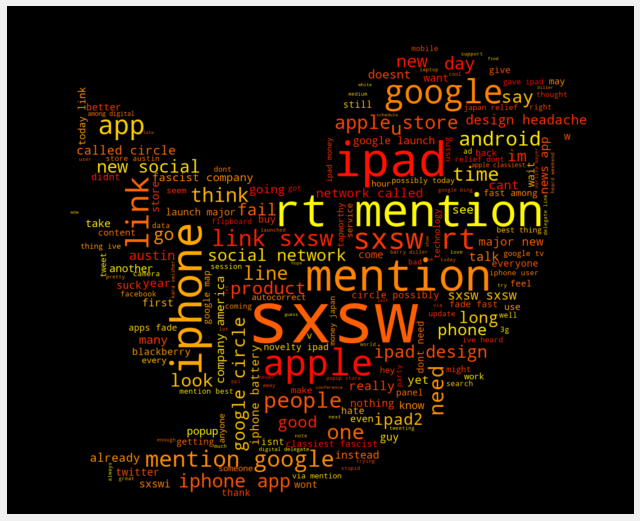

In [47]:
wc_neg = WordCloud(background_color="black", mask=mask, colormap='autumn')
wc_neg.generate(negative_str)

plt.figure(figsize=(10,10))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_neg.to_file('neg_wordcloud.png')

Di sini kita memiliki WordCloud untuk tweet negatif. Beberapa kata/frasa khas yang kita lihat adalah 'fascist company', 'fail', 'design headache', dan 'iphone battery'. Jelas orang-orang yang mengekspresikan sentimen negatif dalam beberapa kasus menggunakan kata-kata yang sangat bermuatan untuk menggambarkan ketidaksukaan mereka terhadap perusahaan atau produk. Sayangnya, kita melihat banyak kata, frasa, dan merek yang sama seperti yang kita lihat di positif yang memberikan bukti lebih lanjut bahwa kita perlu berhati-hati tentang kata mana yang termasuk dalam model.

In [48]:
wc_neg.words_

{'sxsw': 1.0,
 'ipad': 0.3213572854291417,
 'rt mention': 0.29141716566866266,
 'mention': 0.2774451097804391,
 'iphone': 0.25948103792415167,
 'apple': 0.18363273453093812,
 'google': 0.1497005988023952,
 'link': 0.12974051896207583,
 'sxsw rt': 0.11377245508982035,
 'app': 0.08782435129740519,
 'mention google': 0.06387225548902195,
 'link sxsw': 0.06387225548902195,
 'people': 0.059880239520958084,
 'need': 0.05389221556886228,
 'one': 0.05389221556886228,
 'android': 0.0499001996007984,
 'think': 0.0499001996007984,
 'time': 0.04790419161676647,
 'line': 0.04590818363273453,
 'iphone app': 0.04590818363273453,
 'apple store': 0.04590818363273453,
 'u': 0.043912175648702596,
 'say': 0.041916167664670656,
 'product': 0.041916167664670656,
 'look': 0.041916167664670656,
 'new': 0.03992015968063872,
 'go': 0.03992015968063872,
 'day': 0.03992015968063872,
 'new social': 0.03992015968063872,
 'google circle': 0.03792415169660679,
 'ipad design': 0.03792415169660679,
 'fail': 0.035928143

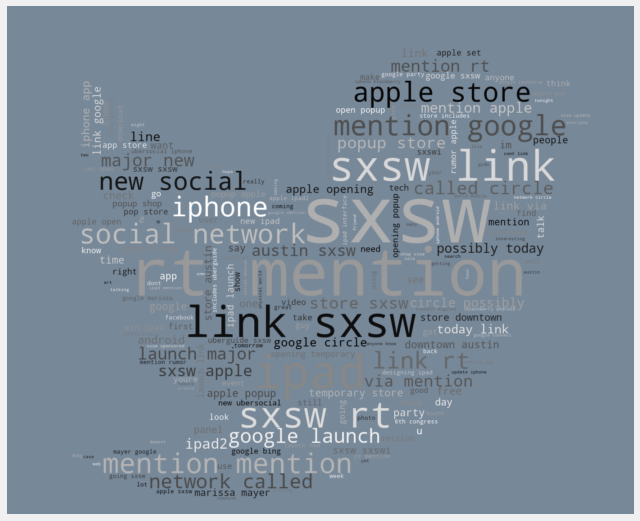

In [49]:
wc_neu = WordCloud(background_color="lightslategray", mask=mask, colormap='gray')
wc_neu.generate(neutral_str)

plt.figure(figsize=(10,10))
plt.imshow(wc_neu, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_neu.to_file('neu_wordcloud.png')

WordCloud yang netral tampaknya tidak memiliki kata-kata bermuatan yang kita lihat di tweet positif dan negatif.

In [50]:
wc_neu.words_

{'sxsw': 1.0,
 'rt mention': 0.7546523016650343,
 'ipad': 0.3036238981390793,
 'link sxsw': 0.2541625857002938,
 'sxsw link': 0.2463271302644466,
 'sxsw rt': 0.1811949069539667,
 'mention google': 0.1792360430950049,
 'mention mention': 0.17238001958863858,
 'iphone': 0.16699314397649365,
 'social network': 0.16699314397649365,
 'apple store': 0.16699314397649365,
 'new social': 0.15279138099902057,
 'link rt': 0.13320274240940255,
 'google launch': 0.11998041136141038,
 'network called': 0.11998041136141038,
 'called circle': 0.11998041136141038,
 'major new': 0.10822722820763957,
 'mention rt': 0.10479921645445642,
 'launch major': 0.10430950048971596,
 'store sxsw': 0.10088148873653281,
 'popup store': 0.09941234084231146,
 'via mention': 0.098922624877571,
 'austin sxsw': 0.09500489715964741,
 'sxsw apple': 0.09353574926542606,
 'mention apple': 0.0910871694417238,
 'ipad2': 0.09059745347698335,
 'circle possibly': 0.0901077375122429,
 'possibly today': 0.0901077375122429,
 'line':

Mari kita lihat sentimen berbeda yang diungkapkan untuk Apple dan produk mereka.

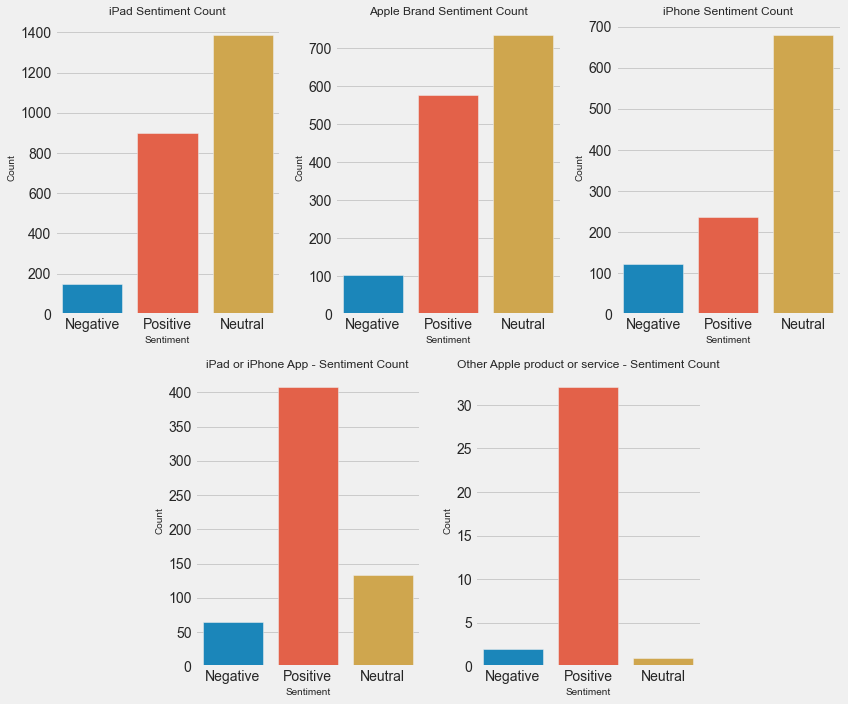

In [51]:
plt.figure(figsize=(12,10))


ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

sns.barplot(x=df_branded.loc[df_branded.brand_product == 'iPad']['sentiment'].value_counts().index,
            y=df_branded.loc[df_branded.brand_product == 'iPad']['sentiment'].value_counts().values, 
            data=df_branded.loc[df_branded.brand_product == 'iPad'], 
            ax=ax1)
ax1.set_xticklabels(['Negative', 'Positive', 'Neutral'])
ax1.set_xlabel('Sentiment', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_title('iPad Sentiment Count',fontsize=12)

sns.barplot(x=df_branded.loc[df_branded.brand_product == 'Apple']['sentiment'].value_counts().index,
            y=df_branded.loc[df_branded.brand_product == 'Apple']['sentiment'].value_counts().values, 
            data=df_branded.loc[df_branded.brand_product == 'Apple'], 
            ax=ax2)
ax2.set_xticklabels(['Negative', 'Positive', 'Neutral'])
ax2.set_xlabel('Sentiment', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.set_title('Apple Brand Sentiment Count', fontsize=12)

sns.barplot(x=df_branded.loc[df_branded.brand_product == 'iPhone']['sentiment'].value_counts().index,
            y=df_branded.loc[df_branded.brand_product == 'iPhone']['sentiment'].value_counts().values, 
            data=df_branded.loc[df_branded.brand_product == 'iPhone'], 
            ax=ax3)
ax3.set_xticklabels(['Negative', 'Positive', 'Neutral'])
ax3.set_xlabel('Sentiment', fontsize=10)
ax3.set_ylabel('Count', fontsize=10)
ax3.set_title('iPhone Sentiment Count', fontsize=12)

sns.barplot(x=df_branded.loc[df_branded.brand_product == 'iPad or iPhone App']['sentiment'].value_counts().index,
            y=df_branded.loc[df_branded.brand_product == 'iPad or iPhone App']['sentiment'].value_counts().values, 
            data=df_branded.loc[df_branded.brand_product == 'iPad or iPhone App'], 
            ax=ax4)
ax4.set_xticklabels(['Negative', 'Positive', 'Neutral'])
ax4.set_xlabel('Sentiment', fontsize=10)
ax4.set_ylabel('Count', fontsize=10)
ax4.set_title('iPad or iPhone App - Sentiment Count', fontsize=12)

sns.barplot(x=df_branded.loc[df_branded.brand_product == 'Other Apple product or service']['sentiment'].value_counts().index,
            y=df_branded.loc[df_branded.brand_product == 'Other Apple product or service']['sentiment'].value_counts().values, 
            data=df_branded.loc[df_branded.brand_product == 'Other Apple product or service'], 
            ax=ax5)
ax5.set_xticklabels(['Negative', 'Positive', 'Neutral'])
ax5.set_xlabel('Sentiment', fontsize=10)
ax5.set_ylabel('Count', fontsize=10)
ax5.set_title('Other Apple product or service - Sentiment Count', fontsize=12)

plt.tight_layout()
plt.savefig('apple_sentiment_count.png')

Dengan pengecualian 'iPad atau iPhone App' dan 'other products dan services' tweet netral adalah jenis tweet yang paling umum. Aplikasi dan layanan lainnya terbukti sangat positif meskipun proporsinya jauh lebih kecil dari keseluruhan tweet.

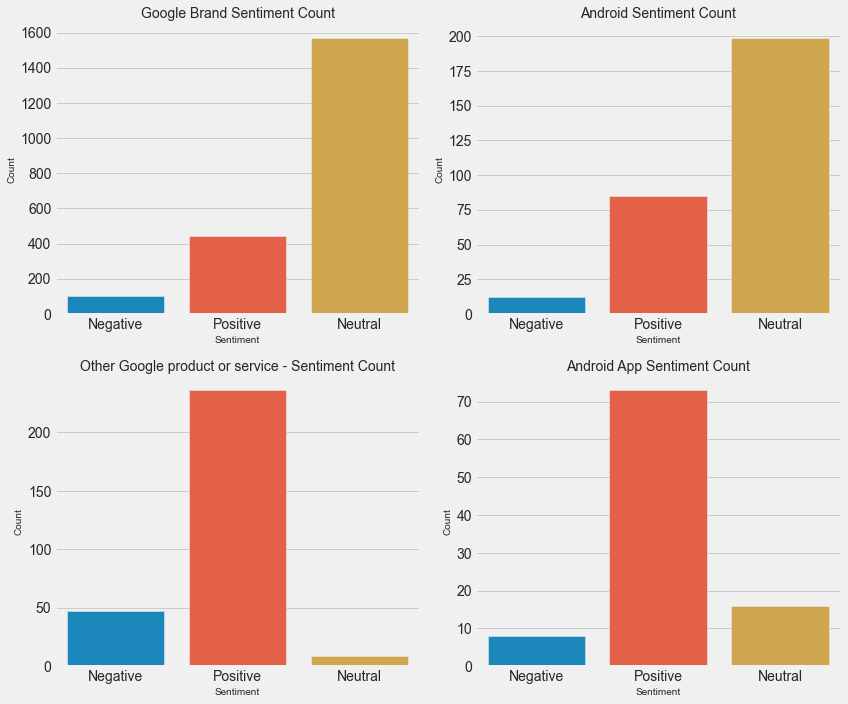

In [52]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10))

sns.barplot(x=df_branded.loc[df_branded.brand_product == 'Google']['sentiment'].value_counts().index,
            y=df_branded.loc[df_branded.brand_product == 'Google']['sentiment'].value_counts().values, 
            data=df_branded.loc[df_branded.brand_product == 'Google'], 
            ax=ax1)
ax1.set_xticklabels(['Negative', 'Positive', 'Neutral'])
ax1.set_xlabel('Sentiment', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_title('Google Brand Sentiment Count', fontsize=14)

sns.barplot(x=df_branded.loc[df_branded.brand_product == 'Android']['sentiment'].value_counts().index,
            y=df_branded.loc[df_branded.brand_product == 'Android']['sentiment'].value_counts().values, 
            data=df_branded.loc[df_branded.brand_product == 'Android'], 
            ax=ax2)
ax2.set_xticklabels(['Negative', 'Positive', 'Neutral'])
ax2.set_xlabel('Sentiment', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.set_title('Android Sentiment Count', fontsize=14)

sns.barplot(x=df_branded.loc[df_branded.brand_product == 'Other Google product or service']['sentiment'].value_counts().index,
            y=df_branded.loc[df_branded.brand_product == 'Other Google product or service']['sentiment'].value_counts().values, 
            data=df_branded.loc[df_branded.brand_product == 'Other Google product or service'], 
            ax=ax3)
ax3.set_xticklabels(['Negative', 'Positive', 'Neutral'])
ax3.set_xlabel('Sentiment', fontsize=10)
ax3.set_ylabel('Count', fontsize=10)
ax3.set_title('Other Google product or service - Sentiment Count', fontsize=14)

sns.barplot(x=df_branded.loc[df_branded.brand_product == 'Android App']['sentiment'].value_counts().index,
            y=df_branded.loc[df_branded.brand_product == 'Android App']['sentiment'].value_counts().values, 
            data=df_branded.loc[df_branded.brand_product == 'Android App'], 
            ax=ax4)
ax4.set_xticklabels(['Negative', 'Positive', 'Neutral'])
ax4.set_xlabel('Sentiment', fontsize=10)
ax4.set_ylabel('Count', fontsize=10)
ax4.set_title('Android App Sentiment Count', fontsize=14)

fig.tight_layout()
plt.savefig('google_sentiment_count.png')

Google tampaknya mengikuti tren yang sama seperti Apple. Meskipun ada lebih sedikit tweet seputar produk Google/Aplikasi Android, tweet yang berpusat di sekitar topik itu sangat positif. Brand Google dan brand Android memiliki tweet yang sangat netral.

Baik Apple maupun Google - saat menghadirkan produk baru - tidak boleh hanya fokus pada produk itu sendiri. Mereka perlu memiliki semacam aplikasi atau fitur software baru yang membuat produk baru layak digunakan. Berdasarkan tweet yang kita miliki, hardware hanya dapat berjalan sejauh ini tanpa software yang baik.

## Feature Engineering

Penting untuk dicatat bahwa model NLP mungkin memerlukan lebih dari sekadar token untuk membuat prediksi yang akurat. Di bawah ini saya akan menulis fungsi untuk menghitung sebagai berikut:
- jumlah hashtag
- jumlah mention
- jumlah tautan web eksternal
- panjang tweet (jumlah kata bukan karakter)
- tanda baca total dalam tweet (tidak termasuk '#' dan '@')

In [53]:
def count_hashtags(text):
    """This function will count the number of hashtags in a tweet. It will search each word for the
    # character and return the total number found within a tweet. Only a cleaned tweet should be passed through
    this function."""
    counter = 0
    for word in text:
        if '#' in word:
            counter += 1
        else:
            continue
    return  counter


def count_mentions(text):
    """This function will count the number of mentions in a tweet. It will search each word for the
    @ character and return the total number found within a tweet. Only a cleaned tweet should be passed
    through this function."""
    counter = 0
    for word in text:
        if '@' in word:
            counter += 1
        else:
            continue
    return counter

def count_weblinks(text):
    """This function will count the number of weblinks in a tweet. It will search each word for 
    'http:' or the string '{link}' and return the total number found within a tweet. Only a cleaned tweet
    should be passed through this function."""
    list_of_counts = []
    for word in text.split():
        http_count = word.count('http:')
        link_count = word.count('{link}')
        list_of_counts.extend([http_count, link_count])
    return sum(list_of_counts)

def count_length_of_tweet(text):
    """This function will count the number of words in a tweet. Only a cleaned tweet should be passed through
    this function."""
    words_no_punc = "".join([word for word in text if word not in string.punctuation])
    return len(words_no_punc.split())

def count_punctuation(text):
    """This function will count the the total punctuation in a tweet.  It will NOT count the '#' or '@' symbols
    as those symbols are used for specific functions on Twitter."""
    annotated_list = []
    punctuation_list = list(string.punctuation)
    punctuation_list.remove('#')
    punctuation_list.remove('@')
    modified_punc = punctuation_list
    
    for word in text.split():
        if word.count('http:') > 0:
            continue
        elif word.count('{link}') > 0:
            continue
        else:
            annotated_list.append(word)
    
    list_of_characters = [char for char in "".join(annotated_list) if char in modified_punc]
    
    return len(list_of_characters)
    
    


Kita akan menambahkan fitur-fitur ini ke dataframe dan melihat distribusinya untuk melihat apakah ada perbedaan di seluruh sentimen.

In [54]:
df_branded['hashtag_count'] = df_branded['tweet'].apply(count_hashtags)
df_branded['mention_count'] = df_branded['tweet'].apply(count_mentions)
df_branded['weblink_count'] = df_branded['tweet'].apply(count_weblinks)
df_branded['tweet_length'] = df_branded['tweet'].apply(count_length_of_tweet)
df_branded['punct_count'] = df_branded['tweet'].apply(count_punctuation)

C:\Users\Luthfi Fadhlillah\AppData\Local\Temp\ipykernel_13364\2340214908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_branded['hashtag_count'] = df_branded['tweet'].apply(count_hashtags)
C:\Users\Luthfi Fadhlillah\AppData\Local\Temp\ipykernel_13364\2340214908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_branded['mention_count'] = df_branded['tweet'].apply(count_mentions)
C:\Users\Luthfi Fadhlillah\AppData\Local\Temp\ipykernel_13364\2340214908.py:3: SettingWithCopyWarning: 
A value is try

In [55]:
df_branded.head(10)

,tweet,brand_product,sentiment,tweet_tokens,hashtag_count,mention_count,weblink_count,tweet_length,punct_count
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,0,"[wesley83, 3g, iphone, 3, hr, tweeting, riseaustin, dead, need, upgrade, plugin, station, sxsw]",2,1,0,23,7
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,1,"[jessedee, know, fludapp, awesome, ipadiphone, app, youll, likely, appreciate, design, also, theyre, giving, free, t, sxsw]",1,2,0,21,6
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,1,"[swonderlin, wait, ipad, 2, also, sale, sxsw]",2,1,0,15,2
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,0,"[sxsw, hope, year, festival, isnt, crashy, year, iphone, app, sxsw]",1,1,0,15,4
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) & Matt Mullenweg (Wordpress)",Google,1,"[sxtxstate, great, stuff, fri, sxsw, marissa, mayer, google, tim, oreilly, tech, booksconferences, matt, mullenweg, wordpress]",1,1,0,16,11
5,@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd,iPad,2,"[teachntech00, new, ipad, apps, speechtherapy, communication, showcased, sxsw, conference, httphtly49n4m, iear, edchat, asd]",5,1,1,18,0
6,"#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan",Android,1,"[sxsw, starting, ctia, around, corner, googleio, hop, skip, jump, good, time, android, fan]",4,0,0,28,2
7,Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB,iPad or iPhone App,1,"[beautifully, smart, simple, idea, rt, madebymany, thenextweb, wrote, hollergram, ipad, app, sxsw, httpbitlyieavob]",2,2,1,17,1
8,Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear,Apple,1,"[counting, day, sxsw, plus, strong, canadian, dollar, mean, stock, apple, gear]",1,0,0,16,0
9,Excited to meet the @samsungmobileus at #sxsw so I can show them my Sprint Galaxy S still running Android 2.1. #fail,Android,1,"[excited, meet, samsungmobileus, sxsw, show, sprint, galaxy, still, running, android, 21, fail]",2,1,0,21,2


C:\Users\Luthfi Fadhlillah\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Luthfi Fadhlillah\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Luthfi Fadhlillah\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

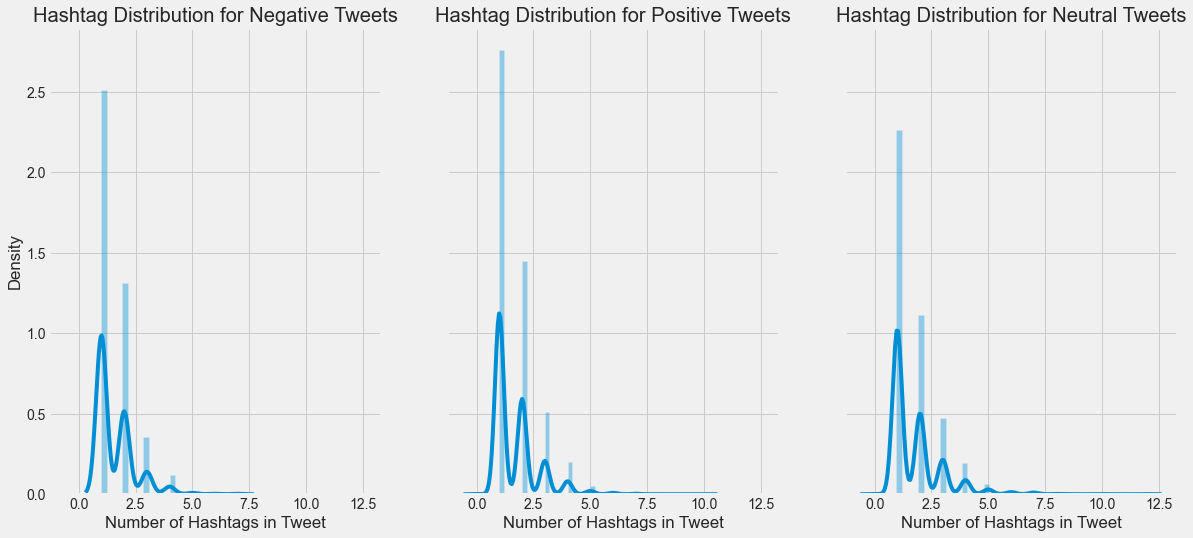

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,8), sharey=True, sharex=True)

sns.distplot(df_branded.loc[df_branded.sentiment == 0]['hashtag_count'],
            ax=ax1)
sns.distplot(df_branded.loc[df_branded.sentiment == 1]['hashtag_count'],
            ax=ax2)
sns.distplot(df_branded.loc[df_branded.sentiment == 2]['hashtag_count'],
            ax=ax3)

ax1.set_xlabel('Number of Hashtags in Tweet')
ax1.set_ylabel('Density')
ax1.set_title('Hashtag Distribution for Negative Tweets')

ax2.set_xlabel('Number of Hashtags in Tweet')
ax2.set_ylabel('Density')
ax2.set_title('Hashtag Distribution for Positive Tweets')

ax3.set_xlabel('Number of Hashtags in Tweet')
ax3.set_ylabel('Density')
ax3.set_title('Hashtag Distribution for Neutral Tweets')
plt.savefig('hashtag_distribution.png')


C:\Users\Luthfi Fadhlillah\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Luthfi Fadhlillah\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Luthfi Fadhlillah\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

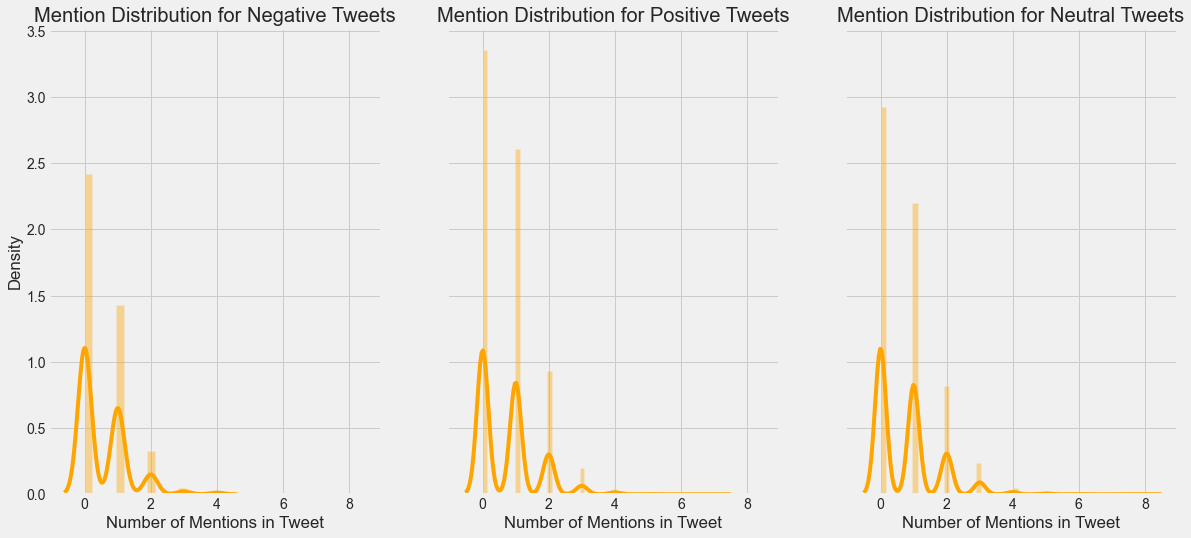

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,8), sharey=True, sharex=True)

sns.distplot(df_branded.loc[df_branded.sentiment == 0]['mention_count'],
            ax=ax1, color='orange')
sns.distplot(df_branded.loc[df_branded.sentiment == 1]['mention_count'],
            ax=ax2, color='orange')
sns.distplot(df_branded.loc[df_branded.sentiment == 2]['mention_count'],
            ax=ax3, color='orange')

ax1.set_xlabel('Number of Mentions in Tweet')
ax1.set_ylabel('Density')
ax1.set_title('Mention Distribution for Negative Tweets')

ax2.set_xlabel('Number of Mentions in Tweet')
ax2.set_ylabel('Density')
ax2.set_title('Mention Distribution for Positive Tweets')

ax3.set_xlabel('Number of Mentions in Tweet')
ax3.set_ylabel('Density')
ax3.set_title('Mention Distribution for Neutral Tweets')
plt.savefig('mention_distribution.png')

C:\Users\Luthfi Fadhlillah\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Luthfi Fadhlillah\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Luthfi Fadhlillah\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

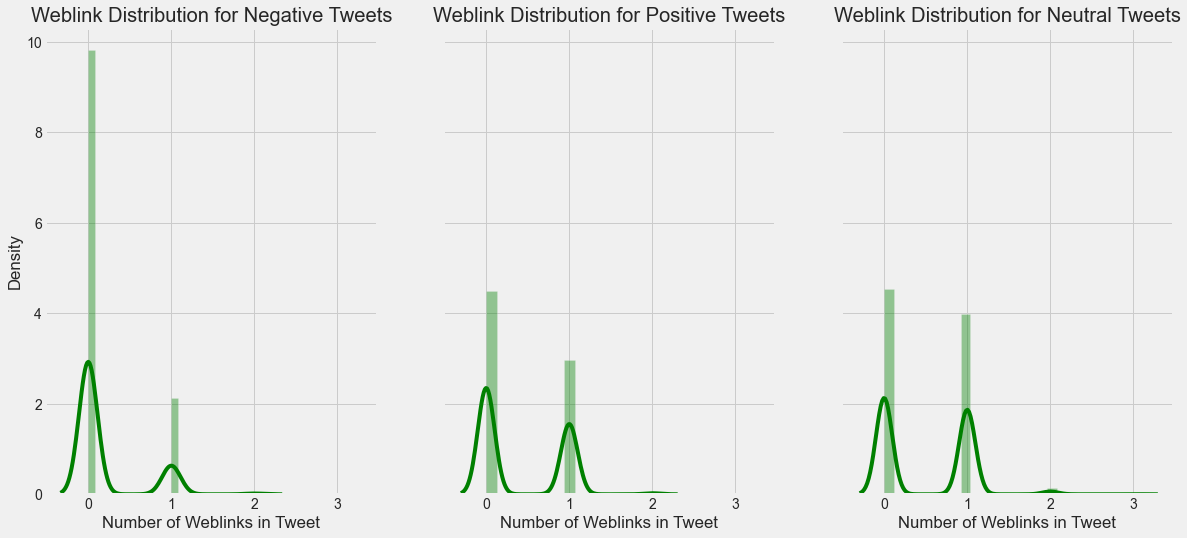

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,8), sharey=True, sharex=True)

sns.distplot(df_branded.loc[df_branded.sentiment == 0]['weblink_count'],
            ax=ax1, color='green')
sns.distplot(df_branded.loc[df_branded.sentiment == 1]['weblink_count'],
            ax=ax2, color='green')
sns.distplot(df_branded.loc[df_branded.sentiment == 2]['weblink_count'],
            ax=ax3, color='green')

ax1.set_xlabel('Number of Weblinks in Tweet')
ax1.set_ylabel('Density')
ax1.set_title('Weblink Distribution for Negative Tweets')

ax2.set_xlabel('Number of Weblinks in Tweet')
ax2.set_ylabel('Density')
ax2.set_title('Weblink Distribution for Positive Tweets')

ax3.set_xlabel('Number of Weblinks in Tweet')
ax3.set_ylabel('Density')
ax3.set_title('Weblink Distribution for Neutral Tweets')
plt.savefig('weblink_distribution.png')

Kita dapat melihat bahwa untuk hashtag, mention, dan weblink, distribusinya mengikuti pola umum yang sama. Modenya nol di semua sentimen dan tampaknya ada lebih banyak tweet positif dengan setidaknya satu hashtag, mention, atau weblink. Tweet netral mengikuti di belakang dan tweet negatif adalah yang terakhir. Penting untuk dicatat bahwa kita memiliki ketidakseimbangan kelas yang besar ketika mempertimbangkan tweet negatif sehingga tweet yang kita miliki mungkin bukan sampel yang paling representatif.

C:\Users\Luthfi Fadhlillah\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Luthfi Fadhlillah\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Luthfi Fadhlillah\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

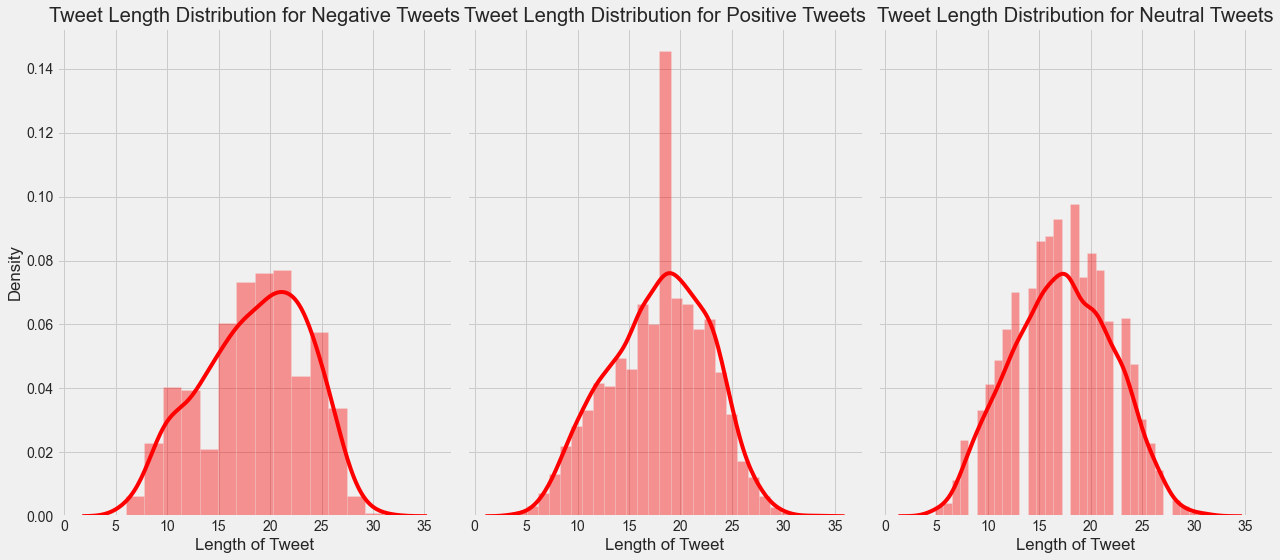

In [59]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,8), sharey=True, sharex=True)

sns.distplot(df_branded.loc[df_branded.sentiment == 0]['tweet_length'],
            ax=ax1, color='red')
sns.distplot(df_branded.loc[df_branded.sentiment == 1]['tweet_length'],
            ax=ax2, color='red')
sns.distplot(df_branded.loc[df_branded.sentiment == 2]['tweet_length'],
            ax=ax3, color='red')

ax1.set_xlabel('Length of Tweet')
ax1.set_ylabel('Density')
ax1.set_title('Tweet Length Distribution for Negative Tweets')

ax2.set_xlabel('Length of Tweet')
ax2.set_ylabel('Density')
ax2.set_title('Tweet Length Distribution for Positive Tweets')

ax3.set_xlabel('Length of Tweet')
ax3.set_ylabel('Density')
ax3.set_title('Tweet Length Distribution for Neutral Tweets')

fig.tight_layout()
plt.savefig('tweet_length_distribution.png')

Distribusi panjang tweet di semua sentimen hampir normal. Tweet netral tampaknya menjadi yang paling normal sementara tweet positif dan negatif tampaknya memiliki skewness yang sedikit negatif. Puncak kurva distribusi tampaknya berpusat di sekitar 20 jadi kita akan melihat boxplot untuk melihat apakah ada perbedaan mencolok dalam distribusi. Jika distribusi terlalu mirip di seluruh sentimen, itu mungkin bukan fitur yang berguna untuk prediktabilitas.

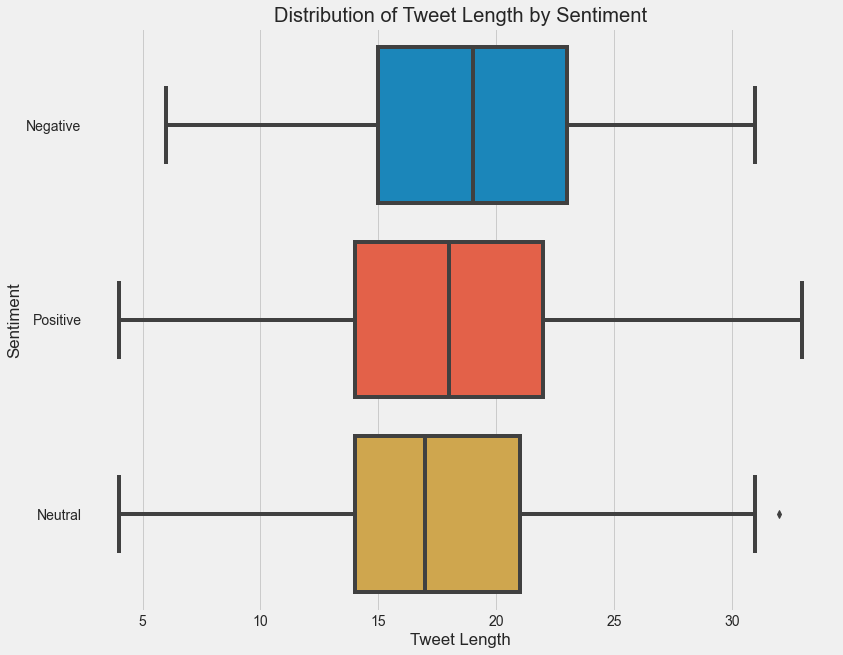

In [60]:
plt.figure(figsize=(12, 10))

ax = sns.boxplot(x='tweet_length', y='sentiment', data=df_branded, orient='h')
ax.set_yticklabels(['Negative', 'Positive', 'Neutral'])
plt.xlabel('Tweet Length')
plt.ylabel('Sentiment')
plt.title('Distribution of Tweet Length by Sentiment')
plt.savefig('tweet_length_boxplot.png')

Sentimen negatif memiliki rata-rata panjang tweet yang sedikit lebih tinggi dan rentang terkecil untuk panjang tweet. Tweet positif memiliki jangkauan yang lebih besar tetapi rata-rata yang lebih kecil untuk panjang tweet. Tweet netral memiliki rata-rata panjang tweet terkecil dengan rentang yang sebanding dengan tweet negatif.

C:\Users\Luthfi Fadhlillah\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Luthfi Fadhlillah\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Luthfi Fadhlillah\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

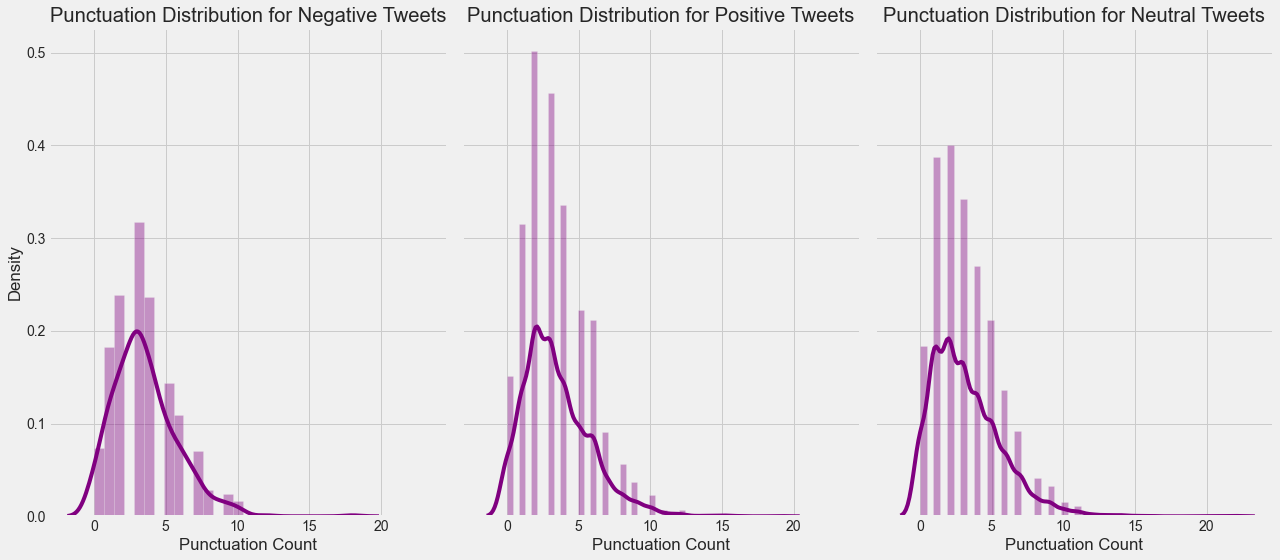

In [61]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,8), sharey=True, sharex=True)

sns.distplot(df_branded.loc[df_branded.sentiment == 0]['punct_count'],
            ax=ax1, color='purple')
sns.distplot(df_branded.loc[df_branded.sentiment == 1]['punct_count'],
            ax=ax2, color='purple')
sns.distplot(df_branded.loc[df_branded.sentiment == 2]['punct_count'],
            ax=ax3, color='purple')

ax1.set_xlabel('Punctuation Count')
ax1.set_ylabel('Density')
ax1.set_title('Punctuation Distribution for Negative Tweets')

ax2.set_xlabel('Punctuation Count')
ax2.set_ylabel('Density')
ax2.set_title('Punctuation Distribution for Positive Tweets')

ax3.set_xlabel('Punctuation Count')
ax3.set_ylabel('Density')
ax3.set_title('Punctuation Distribution for Neutral Tweets')

fig.tight_layout()
plt.savefig('punc_dist.png')

Jumlah tanda baca(punctuation) memiliki kecenderungan positif yang besar untuk ketiga sentimen tersebut. Tampaknya ada proporsi yang lebih besar dari tweet positif yang memiliki antara 0 dan 5 tanda baca. Puncak untuk masing-masing distribusi juga tampak sama yang mungkin berarti fitur ini tidak memuaskan dalam meningkatkan daya prediksi model.

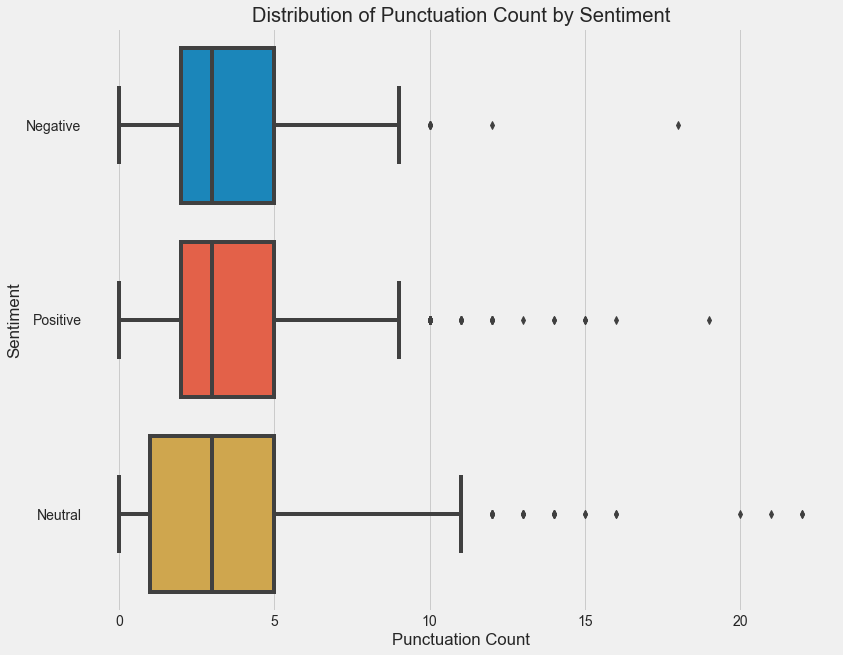

In [62]:
plt.figure(figsize=(12, 10))

ax = sns.boxplot(x='punct_count', y='sentiment', data=df_branded, orient='h')
ax.set_yticklabels(['Negative', 'Positive', 'Neutral'])
plt.xlabel('Punctuation Count')
plt.ylabel('Sentiment')
plt.title('Distribution of Punctuation Count by Sentiment')
plt.savefig('punc_boxplot.png')

Boxplot menunjukkan bahwa sebaran tweet positif dan negatif hampir sama, dengan tweet positif memiliki jumlah outlier yang lebih banyak. Rata-rata di semua sentimen adalah sama di sini. Ini lebih lanjut memberikan bukti bahwa jumlah tanda baca mungkin bukan indikasi sentimen.

In [63]:
pd.set_option('display.max_columns', None)
df_branded.groupby('sentiment').describe()

hashtag_count                                                \
                  count      mean       std  min  25%  50%  75%   max   
sentiment                                                               
0                 611.0  1.587561  0.845495  1.0  1.0  1.0  2.0   7.0   
1                2989.0  1.686183  0.969004  0.0  1.0  1.0  2.0  10.0   
2                4730.0  1.780338  1.144902  0.0  1.0  1.0  2.0  12.0   

          mention_count                                               \
                  count      mean       std  min  25%  50%  75%  max   
sentiment                                                              
0                 611.0  0.549918  0.741319  0.0  0.0  0.0  1.0  4.0   
1                2989.0  0.740381  0.853871  0.0  0.0  1.0  1.0  7.0   
2                4730.0  0.778224  0.920888  0.0  0.0  1.0  1.0  8.0   

          weblink_count                                               \
                  count      mean       std  min  25%  50%  75%  max   
sentiment                                                              
0                 611.0  0.186579  0.402309  0.0  0.0  0.0  0.0  2.0   
1                2989.0  0.407494  0.503559  0.0  0.0  0.0  1.0  2.0   
2                4730.0  0.492178  0.533546  0.0  0.0  0.0  1.0  3.0   

          tweet_length                                                    \
                 count       mean       std  min   25%   50%   75%   max   
sentiment                                                                  
0                611.0  18.502455  5.113266  6.0  15.0  19.0  23.0  31.0   
1               2989.0  17.892606  4.879626  4.0  14.0  18.0  22.0  33.0   
2               4730.0  17.190486  4.882363  4.0  14.0  17.0  21.0  32.0   

          punct_count                                                
                count      mean       std  min  25%  50%  75%   max  
sentiment                                                            
0               611.0  3.531915  2.240509  0.0  2.0  3.0  5.0  18.0  
1              2989.0  3.435597  2.326356  0.0  2.0  3.0  5.0  19.0  
2              4730.0  3.229598  2.446149  0.0  1.0  3.0  5.0  22.0

Kita juga akan melanjutkan dan membuat DataFrame terpisah di mana hanya ada dua kelas untuk sentimen: positif dan negatif/netral. Kemungkinan model akan tampil lebih baik dengan `binary classification` karena masalah ketidakseimbangan kelas tidak akan terlalu parah.

In [64]:
df_binary = df_branded.copy()
df_binary['sentiment'].replace({2:0}, inplace=True)

In [65]:
df_binary.groupby('sentiment').describe()

hashtag_count                                                \
                  count      mean       std  min  25%  50%  75%   max   
sentiment                                                               
0                5341.0  1.758285  1.116353  0.0  1.0  1.0  2.0  12.0   
1                2989.0  1.686183  0.969004  0.0  1.0  1.0  2.0  10.0   

          mention_count                                               \
                  count      mean       std  min  25%  50%  75%  max   
sentiment                                                              
0                5341.0  0.752106  0.905020  0.0  0.0  1.0  1.0  8.0   
1                2989.0  0.740381  0.853871  0.0  0.0  1.0  1.0  7.0   

          weblink_count                                               \
                  count      mean       std  min  25%  50%  75%  max   
sentiment                                                              
0                5341.0  0.457218  0.529199  0.0  0.0  0.0  1.0  3.0   
1                2989.0  0.407494  0.503559  0.0  0.0  0.0  1.0  2.0   

          tweet_length                                                    \
                 count       mean       std  min   25%   50%   75%   max   
sentiment                                                                  
0               5341.0  17.340573  4.926567  4.0  14.0  17.0  21.0  32.0   
1               2989.0  17.892606  4.879626  4.0  14.0  18.0  22.0  33.0   

          punct_count                                                
                count      mean       std  min  25%  50%  75%   max  
sentiment                                                            
0              5341.0  3.264183  2.425220  0.0  1.0  3.0  5.0  22.0  
1              2989.0  3.435597  2.326356  0.0  2.0  3.0  5.0  19.0

## Modeling

Untuk model yang akan di train dan di test di bawah ini, saya akan menggunakan TF-IDF vectorization. Jenis vektorisasi kata ini akan lebih bermanfaat karena seperti yang kita lihat di bar plot jumlah kata dan wordclouds, beberapa kata yang sama muncul di tweet terlepas dari sentimennya. Dengan menggunakan TF-IDF kita dapat lebih memahami frekuensi kata sehubungan dengan berapa banyak tweet yang mengandung kata yang dimaksud.

Kita akan meneruskan token kita yang sudah dicleaning ke vectorizer untuk mendapatkan matriks sparse dengan nilai TF-IDF untuk setiap kata unik.

In [66]:
tfidf_vec = TfidfVectorizer()
X_tfidf = tfidf_vec.fit_transform((df_branded['tweet_tokens'].apply(lambda x: " ".join(x))))

In [67]:
print(X_tfidf.shape)

(8330, 8907)


Jumlah kata unik sedikit lebih banyak dari jumlah tweet yang kita miliki. Ini berarti bahwa overfitting jelas merupakan kemungkinan untuk pemodelan.

In [68]:
#create dataframe of TF-IDF matrix
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vec.get_feature_names()
df_vanilla = pd.concat([df_branded['sentiment'], X_tfidf_df], axis=1)

C:\Users\Luthfi Fadhlillah\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [69]:
X = df_vanilla.drop(columns=['sentiment'])
y = df_vanilla['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=123)

In [70]:
#create training and test sets with added features
X_af = pd.concat([df_branded['hashtag_count'], df_branded['mention_count'], df_branded['weblink_count'],
              df_branded['tweet_length'], X], axis=1)
X_af_train, X_af_test, y_af_train, y_af_test = train_test_split(X_af, y, test_size=0.3, stratify=y,
                                                         random_state=123)

In [71]:
df_tri = pd.read_csv('branded_tweets_clean.csv')
df_bin = pd.read_csv('binary_tweets.csv')

df_tri.drop(columns=['hashtag_count', 'mention_count', 'weblink_count', 
                     'tweet_length', 'punct_count'], inplace=True)
df_bin.drop(columns=['hashtag_count', 'mention_count', 'weblink_count', 
                     'tweet_length', 'punct_count'], inplace=True)

def clean_string(text):
    clean_text = text.replace("[",'').replace("]",'').replace("'",'').replace(",",'')
    return clean_text

df_bin['tweet_tokens'] = df_bin['tweet_tokens'].map(clean_string)
df_tri['tweet_tokens'] = df_tri['tweet_tokens'].map(clean_string)

In [72]:
df_tri.head()

,tweet,brand_product,sentiment,tweet_tokens
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,0,wesley83 3g iphone 3 hr tweeting riseaustin dead need upgrade plugin station sxsw
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,1,jessedee know fludapp awesome ipadiphone app youll likely appreciate design also theyre giving free t sxsw
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,1,swonderlin wait ipad 2 also sale sxsw
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,0,sxsw hope year festival isnt crashy year iphone app sxsw
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) & Matt Mullenweg (Wordpress)",Google,1,sxtxstate great stuff fri sxsw marissa mayer google tim oreilly tech booksconferences matt mullenweg wordpress


In [73]:
df_bin.head()

,tweet,brand_product,sentiment,tweet_tokens
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,0,wesley83 3g iphone 3 hr tweeting riseaustin dead need upgrade plugin station sxsw
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,1,jessedee know fludapp awesome ipadiphone app youll likely appreciate design also theyre giving free t sxsw
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,1,swonderlin wait ipad 2 also sale sxsw
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,0,sxsw hope year festival isnt crashy year iphone app sxsw
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) & Matt Mullenweg (Wordpress)",Google,1,sxtxstate great stuff fri sxsw marissa mayer google tim oreilly tech booksconferences matt mullenweg wordpress


In [74]:
bag_of_words = df_bin['tweet_tokens']
words_list = []
for string_ele in bag_of_words:
    split_up_words = string_ele.split()
    for i in range(0, len(split_up_words)):
        words_list.append(split_up_words[i])
        
total_vocabulary = set(words_list)

In [75]:
len(words_list)

101802

In [76]:
len(total_vocabulary)

8929

In [77]:
y_bin = df_bin['sentiment']
y_tri = pd.get_dummies(df_tri['sentiment']).values

In [78]:
tokenizer_bin = text.Tokenizer(num_words=6500)
tokenizer_bin.fit_on_texts(list(df_bin['tweet_tokens']))
list_tokenized_tweets_bin = tokenizer_bin.texts_to_sequences(df_bin['tweet_tokens'])
X_bin = sequence.pad_sequences(list_tokenized_tweets_bin)

In [79]:
base_model_bin = Sequential()

In [80]:
embedding_size = 100
base_model_bin.add(Embedding(6500, embedding_size))
base_model_bin.add(LSTM(30))
base_model_bin.add(Dense(20, activation='relu'))
base_model_bin.add(Dense(1, activation='sigmoid'))

In [81]:
base_model_bin.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [82]:
base_model_bin.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         650000    
                                                                 
 lstm (LSTM)                 (None, 30)                15720     
                                                                 
 dense (Dense)               (None, 20)                620       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 666,361
Trainable params: 666,361
Non-trainable params: 0
_________________________________________________________________


In [83]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

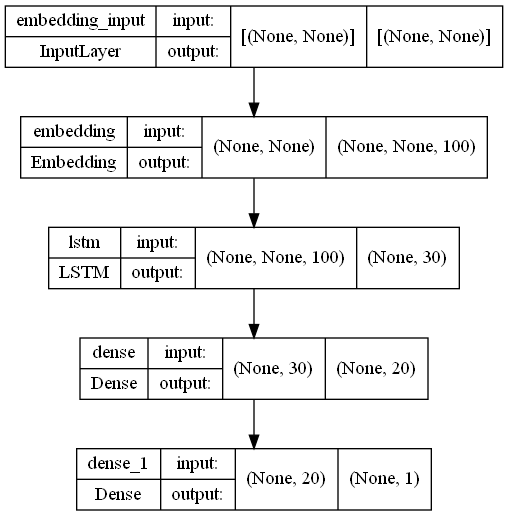

In [84]:
keras.utils.plot_model(base_model_bin, "basemodelbin_function.png", show_shapes=True)

In [85]:
base_model_val = base_model_bin.fit(X_bin, y_bin, epochs=10, batch_size=256, validation_split=0.3)

Epoch 1/10
23/23 [==============================] - 5s 85ms/step - loss: 0.6722 - accuracy: 0.6263 - val_loss: 0.6414 - val_accuracy: 0.6495
Epoch 2/10
23/23 [==============================] - 1s 47ms/step - loss: 0.6281 - accuracy: 0.6393 - val_loss: 0.6169 - val_accuracy: 0.6523
Epoch 3/10
23/23 [==============================] - 1s 42ms/step - loss: 0.5518 - accuracy: 0.7023 - val_loss: 0.5815 - val_accuracy: 0.6911
Epoch 4/10
23/23 [==============================] - 1s 40ms/step - loss: 0.4433 - accuracy: 0.8168 - val_loss: 0.5995 - val_accuracy: 0.6907
Epoch 5/10
23/23 [==============================] - 1s 41ms/step - loss: 0.3430 - accuracy: 0.8583 - val_loss: 0.6702 - val_accuracy: 0.6799
Epoch 6/10
23/23 [==============================] - 1s 42ms/step - loss: 0.2828 - accuracy: 0.8839 - val_loss: 0.8102 - val_accuracy: 0.7063
Epoch 7/10
23/23 [==============================] - 1s 51ms/step - loss: 0.2444 - accuracy: 0.9014 - val_loss: 0.8028 - val_accuracy: 0.6827
Epoch 8/10
23

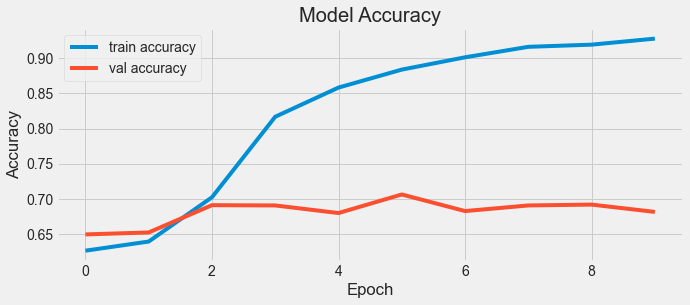

In [86]:
# Visualization model accuracy (train and val accuracy)

fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(base_model_val.history['accuracy'], label = 'train accuracy')
ax.plot(base_model_val.history['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

## Model Evaluation

Text(0, 0.5, 'Loss')

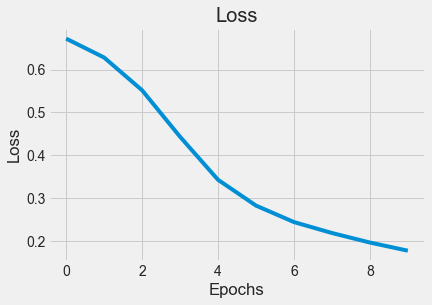

In [87]:
#access history attribute to get the record
history = base_model_val.history

#plot loss and then accuracy over time
plt.figure()
plt.plot(history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

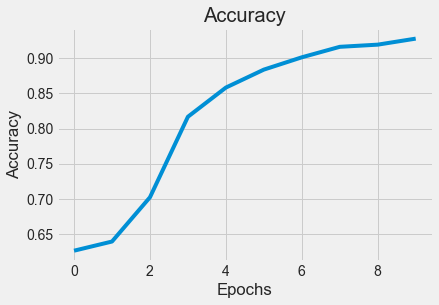

In [88]:
plt.figure()
plt.plot(history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

## Model Improvement

In [89]:
model_bin = Sequential()

In [90]:
#dengan menggunakan Dropout layer, kita dapat mengurangi overfitting
embedding_size = 100
model_bin.add(Embedding(6500, embedding_size))
model_bin.add(LSTM(30))
model_bin.add(Dropout(0.5))
model_bin.add(Dense(20, activation='relu'))
model_bin.add(Dropout(0.5))
model_bin.add(Dense(1, activation='sigmoid'))

In [91]:
model_bin.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [92]:
model_bin.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         650000    
                                                                 
 lstm_1 (LSTM)               (None, 30)                15720     
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 666,361
Trainable params: 666,361
Non-tr

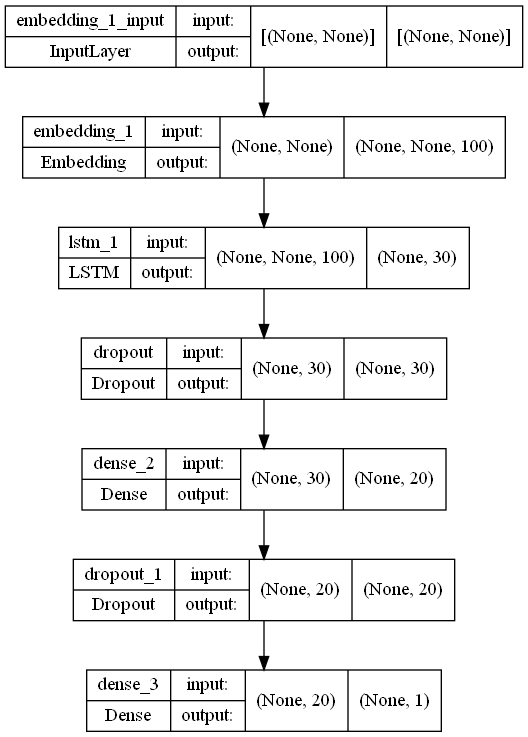

In [93]:
keras.utils.plot_model(model_bin, "modelbin_function.png", show_shapes=True)

In [94]:
model1 = model_bin.fit(X_bin, y_bin, epochs=50, batch_size=256, validation_split=0.3)

Epoch 1/50
23/23 [==============================] - 4s 63ms/step - loss: 0.6695 - accuracy: 0.6342 - val_loss: 0.6409 - val_accuracy: 0.6495
Epoch 2/50
23/23 [==============================] - 1s 42ms/step - loss: 0.6358 - accuracy: 0.6385 - val_loss: 0.6212 - val_accuracy: 0.6543
Epoch 3/50
23/23 [==============================] - 1s 42ms/step - loss: 0.5803 - accuracy: 0.6925 - val_loss: 0.5828 - val_accuracy: 0.6895
Epoch 4/50
23/23 [==============================] - 1s 44ms/step - loss: 0.4769 - accuracy: 0.7933 - val_loss: 0.5933 - val_accuracy: 0.6855
Epoch 5/50
23/23 [==============================] - 1s 45ms/step - loss: 0.3884 - accuracy: 0.8439 - val_loss: 0.6509 - val_accuracy: 0.6867
Epoch 6/50
23/23 [==============================] - 1s 40ms/step - loss: 0.3444 - accuracy: 0.8688 - val_loss: 0.6784 - val_accuracy: 0.6895
Epoch 7/50
23/23 [==============================] - 1s 39ms/step - loss: 0.2990 - accuracy: 0.8856 - val_loss: 0.7773 - val_accuracy: 0.6775
Epoch 8/50
23

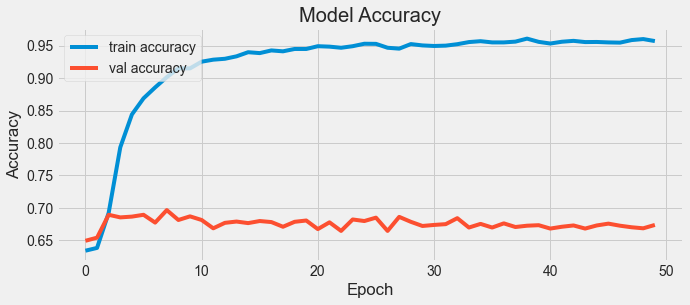

In [95]:
# Visualization model accuracy (train and val accuracy)

fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(model1.history['accuracy'], label = 'train accuracy')
ax.plot(model1.history['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

In [96]:
model_bin2 = Sequential()
model_bin2.add(Embedding(6500, 32))
model_bin2.add(LSTM(15))
model_bin2.add(Dropout(0.5))
model_bin2.add(Dense(10, activation='relu'))
model_bin2.add(Dropout(0.5))
model_bin2.add(Dense(1, activation='sigmoid'))

In [97]:
model_bin2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [98]:
model_bin2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          208000    
                                                                 
 lstm_2 (LSTM)               (None, 15)                2880      
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                160       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 211,051
Trainable params: 211,051
Non-tr

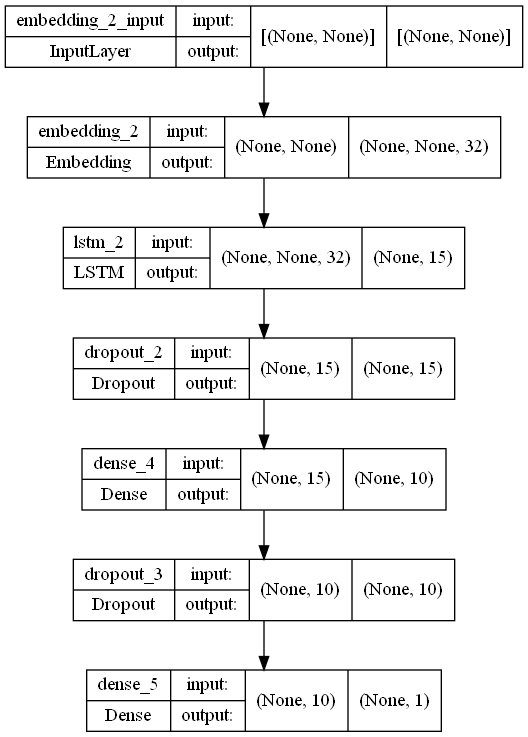

In [99]:
keras.utils.plot_model(model_bin2, "modelbin2_function.png", show_shapes=True)

In [100]:
model2 = model_bin2.fit(X_bin, y_bin, epochs=50, batch_size=256, validation_split=0.3)

Epoch 1/50
23/23 [==============================] - 3s 49ms/step - loss: 0.6856 - accuracy: 0.6153 - val_loss: 0.6722 - val_accuracy: 0.6495
Epoch 2/50
23/23 [==============================] - 0s 17ms/step - loss: 0.6650 - accuracy: 0.6321 - val_loss: 0.6461 - val_accuracy: 0.6495
Epoch 3/50
23/23 [==============================] - 0s 16ms/step - loss: 0.6528 - accuracy: 0.6357 - val_loss: 0.6395 - val_accuracy: 0.6495
Epoch 4/50
23/23 [==============================] - 0s 19ms/step - loss: 0.6346 - accuracy: 0.6390 - val_loss: 0.6202 - val_accuracy: 0.6539
Epoch 5/50
23/23 [==============================] - 0s 16ms/step - loss: 0.5930 - accuracy: 0.6695 - val_loss: 0.5882 - val_accuracy: 0.6803
Epoch 6/50
23/23 [==============================] - 0s 16ms/step - loss: 0.5130 - accuracy: 0.7479 - val_loss: 0.5807 - val_accuracy: 0.6891
Epoch 7/50
23/23 [==============================] - 0s 20ms/step - loss: 0.4640 - accuracy: 0.7932 - val_loss: 0.6009 - val_accuracy: 0.7039
Epoch 8/50
23

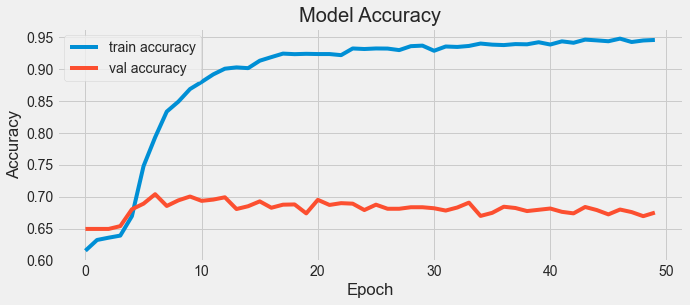

In [101]:
# Visualization model accuracy (train and val accuracy)

fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(model2.history['accuracy'], label = 'train accuracy')
ax.plot(model2.history['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

In [102]:
model_bin3 = Sequential()
model_bin3.add(Embedding(6500, 16))
model_bin3.add(LSTM(10))
model_bin3.add(Dropout(0.5))
model_bin3.add(Dense(5, activation='relu'))
model_bin3.add(Dropout(0.5))
model_bin3.add(Dense(1, activation='sigmoid'))

In [103]:
model_bin3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bin3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 16)          104000    
                                                                 
 lstm_3 (LSTM)               (None, 10)                1080      
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dropout_5 (Dropout)         (None, 5)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 105,141
Trainable params: 105,141
Non-tr

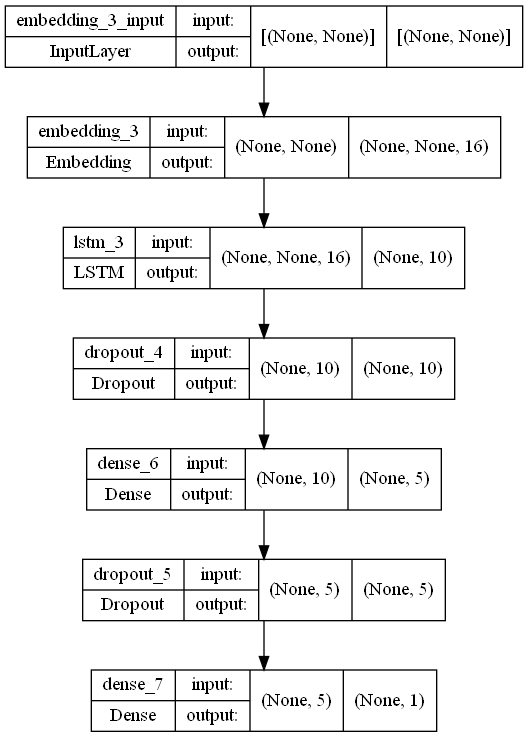

In [104]:
keras.utils.plot_model(model_bin3, "modelbin3_function.png", show_shapes=True)

In [105]:
model3 = model_bin3.fit(X_bin, y_bin, epochs=50, batch_size=256, validation_split=0.3)

Epoch 1/50
23/23 [==============================] - 3s 34ms/step - loss: 0.6853 - accuracy: 0.6164 - val_loss: 0.6706 - val_accuracy: 0.6495
Epoch 2/50
23/23 [==============================] - 0s 14ms/step - loss: 0.6688 - accuracy: 0.6301 - val_loss: 0.6499 - val_accuracy: 0.6495
Epoch 3/50
23/23 [==============================] - 0s 14ms/step - loss: 0.6591 - accuracy: 0.6340 - val_loss: 0.6466 - val_accuracy: 0.6495
Epoch 4/50
23/23 [==============================] - 0s 14ms/step - loss: 0.6465 - accuracy: 0.6340 - val_loss: 0.6351 - val_accuracy: 0.6495
Epoch 5/50
23/23 [==============================] - 0s 14ms/step - loss: 0.6291 - accuracy: 0.6380 - val_loss: 0.6170 - val_accuracy: 0.6519
Epoch 6/50
23/23 [==============================] - 0s 14ms/step - loss: 0.5934 - accuracy: 0.6534 - val_loss: 0.5979 - val_accuracy: 0.6755
Epoch 7/50
23/23 [==============================] - 0s 14ms/step - loss: 0.5546 - accuracy: 0.7037 - val_loss: 0.5868 - val_accuracy: 0.6955
Epoch 8/50
23

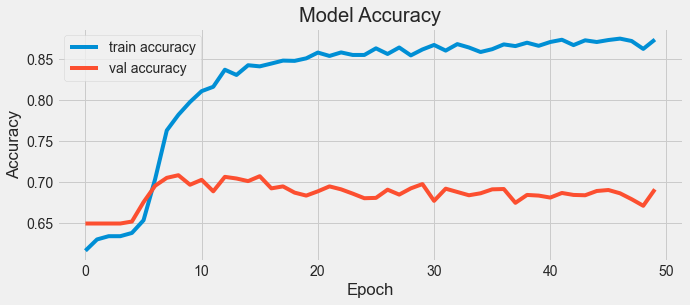

In [106]:
# Visualization model accuracy (train and val accuracy)

fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(model3.history['accuracy'], label = 'train accuracy')
ax.plot(model3.history['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

In [107]:
model_bin4 = Sequential()
model_bin4.add(Embedding(6500, 16))
model_bin4.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l1(0.005)))
model_bin4.add(Dropout(0.5))
model_bin4.add(LSTM(5))
model_bin4.add(Dropout(0.3))
model_bin4.add(Dense(4, activation='relu', kernel_regularizer=regularizers.l1(0.005)))
model_bin4.add(Dropout(0.3))
model_bin4.add(Dense(1, activation='sigmoid'))

In [108]:
model_bin4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bin4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 16)          104000    
                                                                 
 dense_8 (Dense)             (None, None, 8)           136       
                                                                 
 dropout_6 (Dropout)         (None, None, 8)           0         
                                                                 
 lstm_4 (LSTM)               (None, 5)                 280       
                                                                 
 dropout_7 (Dropout)         (None, 5)                 0         
                                                                 
 dense_9 (Dense)             (None, 4)                 24        
                                                                 
 dropout_8 (Dropout)         (None, 4)                

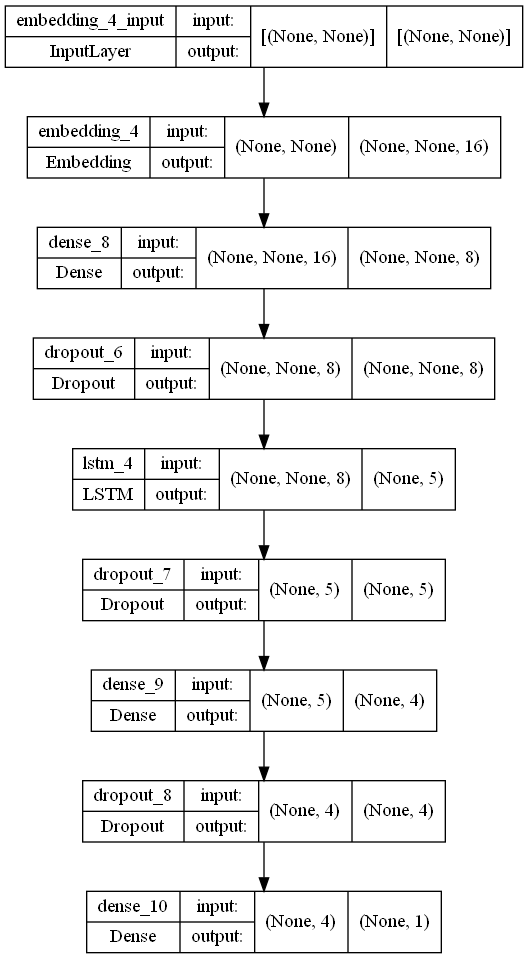

In [109]:
keras.utils.plot_model(model_bin4, "modelbin4_function.png", show_shapes=True)

In [110]:
model4 = model_bin4.fit(X_bin, y_bin, epochs=25, batch_size=150, validation_split=0.25)

Epoch 1/25
42/42 [==============================] - 3s 23ms/step - loss: 0.8678 - accuracy: 0.6245 - val_loss: 0.8382 - val_accuracy: 0.6457
Epoch 2/25
42/42 [==============================] - 0s 11ms/step - loss: 0.8232 - accuracy: 0.6392 - val_loss: 0.7963 - val_accuracy: 0.6457
Epoch 3/25
42/42 [==============================] - 0s 11ms/step - loss: 0.7933 - accuracy: 0.6397 - val_loss: 0.7683 - val_accuracy: 0.6457
Epoch 4/25
42/42 [==============================] - 0s 11ms/step - loss: 0.7628 - accuracy: 0.6397 - val_loss: 0.7408 - val_accuracy: 0.6457
Epoch 5/25
42/42 [==============================] - 0s 12ms/step - loss: 0.7326 - accuracy: 0.6397 - val_loss: 0.7170 - val_accuracy: 0.6457
Epoch 6/25
42/42 [==============================] - 0s 11ms/step - loss: 0.7032 - accuracy: 0.6397 - val_loss: 0.6849 - val_accuracy: 0.6457
Epoch 7/25
42/42 [==============================] - 0s 11ms/step - loss: 0.6774 - accuracy: 0.6441 - val_loss: 0.6598 - val_accuracy: 0.6457
Epoch 8/25
42

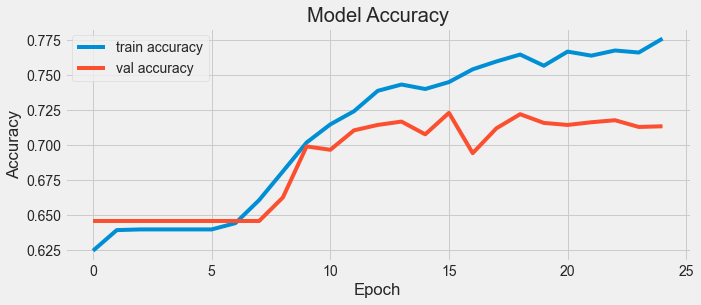

In [111]:
# Visualization model accuracy (train and val accuracy)

fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(model4.history['accuracy'], label = 'train accuracy')
ax.plot(model4.history['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

## Final Model

In [112]:
import pickle

In [113]:
pickle.dump(model4, open('model4.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://5fa0fbcc-923b-4a0e-8a80-d9b9262d58b2/assets


INFO:tensorflow:Assets written to: ram://5fa0fbcc-923b-4a0e-8a80-d9b9262d58b2/assets


## Additional Model

### Multinomial Bayes Classifier

In [114]:
###Multinomial Bayes
mnb_clf_vanilla = MultinomialNB()
mnb_clf_vanilla.fit(X_train, y_train)
mnb_clf_vanilla_cv_mean = np.mean(cross_val_score(mnb_clf_vanilla, X_train, y_train,
                                                 cv=5, scoring='accuracy', n_jobs=-1))

In [115]:
print(f"Training Accuracy: {mnb_clf_vanilla.score(X_train, y_train)}")
print(f"Mean Cross Validation Training Accuracy: {mnb_clf_vanilla_cv_mean}")
print(f"Testing Accuracy: {mnb_clf_vanilla.score(X_test, y_test)}")

Training Accuracy: 0.7518435945806894
Mean Cross Validation Training Accuracy: 0.6251075531960238
Testing Accuracy: 0.6250500200080032


In [116]:
mnb_vanilla_param = {'alpha':[0, 0.01, 1, 2, 10],
                     'fit_prior':[True, False]}

gs_mnb_vanilla = GridSearchCV(mnb_clf_vanilla, param_grid=mnb_vanilla_param, cv=5, n_jobs=-1)
gs_mnb_vanilla.fit(X_train, y_train)
gs_mnb_vanilla_cv_mean = np.mean(cross_val_score(gs_mnb_vanilla, X_train, y_train,
                                                 cv=5, scoring='accuracy', n_jobs=-1))
gs_mnb_vanilla.best_params_

{'alpha': 2, 'fit_prior': False}

In [117]:
print(f"GridSearchCV Training Score: {gs_mnb_vanilla.score(X_train, y_train)}")
print(f"Mean Cross Validation Training Accuracy: {gs_mnb_vanilla_cv_mean}")
print(f"GridSearchCV Testing Score: {gs_mnb_vanilla.score(X_test, y_test)}")

GridSearchCV Training Score: 0.7761961927628194
Mean Cross Validation Training Accuracy: 0.6261336261190751
GridSearchCV Testing Score: 0.640656262505002


In [118]:
#using added features
mnb_af = MultinomialNB()

In [119]:
#grid search with added features
mnb_af_param = {'alpha':[0, 0.01, 1, 10],
                     'fit_prior':[True, False]}

gs_mnb_af = GridSearchCV(mnb_af, param_grid=mnb_af_param, cv=5, n_jobs=-1)
gs_mnb_af.fit(X_af_train, y_af_train)
gs_mnb_af.best_params_

{'alpha': 0.01, 'fit_prior': True}

In [120]:
gs_mnb_af_cv_mean = np.mean(cross_val_score(gs_mnb_af, X_af_train, y_af_train,
                                                 cv=5, scoring='accuracy', n_jobs=-1))

In [121]:
print(f"Added Features Training Score: {gs_mnb_af.score(X_af_train, y_af_train)}")
print(f"Added Features Cross Validation Mean: {gs_mnb_af_cv_mean}")
print(f"Added Features Testing Score: {gs_mnb_af.score(X_af_test, y_af_test)}")

Added Features Training Score: 0.8888698336477449
Added Features Cross Validation Mean: 0.6143024071044637
Added Features Testing Score: 0.6230492196878752


In [122]:
print(classification_report(y_af_test, gs_mnb_af.predict(X_af_test)))

              precision    recall  f1-score   support

           0       0.37      0.34      0.36       183
           1       0.57      0.50      0.53       897
           2       0.68      0.74      0.71      1419

    accuracy                           0.62      2499
   macro avg       0.54      0.53      0.53      2499
weighted avg       0.62      0.62      0.62      2499



C:\Users\Luthfi Fadhlillah\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


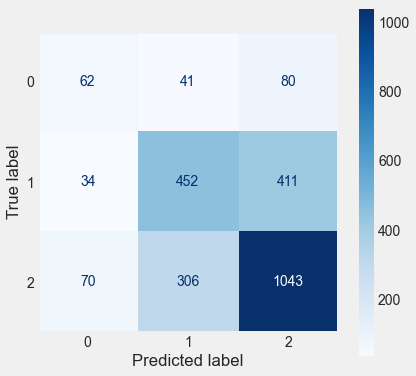

In [123]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.grid(False)
plot_confusion_matrix(gs_mnb_af, X_af_test, y_af_test, cmap='Blues', ax=ax)

Algoritma Multinomial Naive Bayes melakukan pekerjaan yang baik dalam memprediksi sentimen secara umum. Ketika kita melihat kinerja oleh masing-masing kelas, kita dapat melihat bahwa ia melakukan pekerjaan yang sangat baik dalam memprediksi tweet netral, tetapi tidak berkinerja baik dengan tweet positif atau negatif. Jelas, kurangnya tweet negatif secara keseluruhan berarti bahwa ada jumlah data pelatihan yang tidak mencukupi bagi model untuk memprediksi dengan benar apakah tweet negatif.

Kita juga dapat melihat bahwa model tidak bekerja dengan baik dengan fitur yang ditambahkan. Berdasarkan analisis data eksplorasi di atas, tidak ada cukup diferensiasi lintas sentimen untuk fitur yang berbeda guna membantu prediktabilitas.

## Conclusion



*   Pada percobaan kali ini dilakukan 4 pemodelan untuk menemukan model terbaik untuk melakukan sentimen analisis
*   Model pertama dilakukan secara standar dengan epoch rendah dan dihasilkan hasil yang baik pada 5 epoch pertama akan tetapi 5 epoch selanjutnya nilai akurasi turun secara drastis. Hal ini masih diselidiki apa penyebab dari nilai akurasi yang turun drastis

*   Dilakukan model improvement terhadap model pertama dengan membuat model kedua dengan menambahkan jumlah epoch dan terlihat bahwa model kedua menunjukkan kenikan nilai akurasi yang signifikan namun untuk akurasi testing set nya masih rendah
*   Untuk mencari model terbaik maka dibuat model ketiga dan keempat. Pada model ini ditambahkan droput yang bertujuan untuk mengurangi overfitting. Hasil model ketiga menunjukkan nilai akurasi training yang lebih baik dibanding model-model sebelumnya namun sayangnya pada metode ini masih belum bisa memperbaiki nilai akurasi testingnya

*   Kesimpulan dari percobaan empat model ini didapatkan model terbaik adalah model4 karena overfitting tidak terlalu jauh.







Dataset kali ini menyajikan persebaran data yang tidak seimbang (imbalance) pada kelasnya yang cukup signifikan karena sebagian besar sampel diberi label netral, indikator sentimen menjadi lebih sedikit.

Untuk meningkatkan nilai akurasi model pada training set dan testing set dan dapat lebih general persebarannya, disarankan untuk mengumpulkan lebih banyak data yang memiliki persentase label yang lebih tinggi yang menunjukkan sentimen positif atau negatif. Menambahkan lebih banyak data juga dapat memungkinkan penggunaan model nlp yang lebih baik, yang dapat membantu mengurangi waktu proses.

## Business Understanding

### Mengapa kita membutuhkan model yang dapat mengevaluasi sentimen tweet?

Dalam dataset ini kita memiliki banyak tweet yang berpusat di sekitar produk Apple atau Google dan Festival SXSW sekitar Maret 2011. Festival SXSW menarik ribuan orang setiap tahun dan menyediakan perusahaan teknologi besar seperti Apple atau Google untuk memamerkan produk dan layanan mereka. Jika sebuah perusahaan akan menginvestasikan waktu dan uang untuk memamerkan produk mereka di sebuah festival, maka mereka pasti ingin memahami berapa banyak keterlibatan dan minat yang mereka kumpulkan dari para peserta. Solusi yang mungkin untuk mengukur keterlibatan mungkin dengan menawarkan survei kepada peserta dan kemudian mengevaluasi keterlibatan/minat berdasarkan tanggapan.

Di sinilah platform media sosial seperti Twitter dapat membantu. Twitter gratis untuk digunakan dan peserta mungkin sangat terdorong untuk berbagi pengalaman mereka di media sosial. Jika seseorang membagikan pengalamannya di media sosial, maka mungkin juga pengikut dan/atau teman mereka akan berinteraksi dengan mereka - artinya kita berpotensi menerima umpan balik dari seseorang yang bahkan tidak menghadiri festival! Jika cukup banyak orang yang men-tweet tentang merek dan/atau produk tersebut, maka itu mungkin menjadi trending topik yang selanjutnya meningkatkan kemungkinan puluhan ribu atau bahkan jutaan orang akan men-tweet tentang produk tersebut. Sebuah model kemudian dapat menganalisis masing-masing tweet tersebut dan kita dapat memiliki umpan balik yang hampir instan tentang bagaimana perasaan orang. Kita dapat memperoleh pemahaman tentang fitur-fitur yang diterima dengan baik dan mungkin mendapatkan wawasan tentang hal-hal apa yang perlu ditingkatkan.